In [1]:
# import docx
from __future__ import division
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, auc, roc_curve)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, OneClassSVM
from statistics import stdev
from random import choice
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from numpy import interp

In [2]:
tf.get_logger().setLevel('ERROR')

In [3]:
#--------------------------------------
#Data
#--------------------------------------

df = pd.read_csv("../data/mrmr_selected/MRMR_selected_20_psd_580features.csv", index_col=0)
print(df.head())

#First values: 0 - CNTRL, 1 - PD patients
#changed to: 1 - PD patients, 2 - CNTRL
df['target'].replace({0: 2}, inplace=True)

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, shuffle=True)
base_fpr = np.linspace(0, 1, 101)


   Theta_channel108  Beta_channel84  Gamma_channel98  Theta_channel87  \
0      15281.672679     1377.010403        79.132959      6984.029472   
1       8248.980694     1608.720018        64.440371      3609.103338   
2      10842.130484     1164.485258        64.869847      2247.778890   
3       5884.878907     1216.038707        65.908566      1466.491726   
4       6545.790193     4469.642297       102.590854      1272.076307   

   Delta_channel31  Gamma_channel96  Delta_channel108  Delta_channel90  \
0      1136.924314       214.628148      18037.781628      1281.570728   
1       971.318912       182.820668       8999.967670      1819.926217   
2      1128.493249       174.122684      22553.294220      2347.664889   
3       934.730925       176.261292      22774.671435      1001.833562   
4      4307.104960       168.185473      11397.442137      5297.673360   

   Theta_channel31  Gamma_channel115  ...  Delta_channel107  Gamma_channel112  \
0      1356.935941        211.86330

In [5]:
#--------------------------------------
#Errors
#--------------------------------------

def predictionR(classifier, X_train, X_test, y_train, y_test):
    pipe = make_pipeline(StandardScaler(), classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    return y_test, y_pred, pipe

def evaluationR(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat, labels=[1.0, 2.0])
    sensitivity = cm[0,0]/(cm[0,0] + cm[0,1])
    specificity = cm[1,1]/(cm[1,1] + cm[1,0])
    accuracy = accuracy_score(y, y_hat)
    fpr, tpr, thresholds = roc_curve(y, y_hat, pos_label=2)
    AUC = auc(fpr, tpr)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    return accuracy, sensitivity, specificity, AUC, tpr

def PRES(k, res_acc, res_sens, res_spec, res_AUC, tprs):
    print("%1d %4.2f  ±%4.2f    %4.2f ±%4.2f   %4.2f ±%4.2f   %4.2f ±%4.2f" % (k, 100*sum(res_acc)/len(res_acc), 100*stdev(res_acc), 100*sum(res_sens)/len(res_sens), 100*stdev(res_sens),
          100*sum(res_spec)/len(res_spec), 100*stdev(res_spec), 100*sum(res_AUC)/len(res_AUC), 100*stdev(res_AUC)))
    tprs = np.array(tprs)
    mean_tprs = tprs.mean(axis=0)
    std = tprs.std(axis=0)
    tprs_upper = np.minimum(mean_tprs + std, 1)
    tprs_lower = mean_tprs - std
    plt.plot(base_fpr, mean_tprs, 'b')
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.text(x = 0.5, y = 0.2, s="AUC = %4.4f" % (sum(res_AUC)/len(res_AUC)))
    plt.show()

In [6]:
scaler = StandardScaler()

Run 0
y_test
29    1
5     2
33    1
6     2
9     2
34    1
4     2
36    1
8     2
17    2
21    1
22    1
37    1
2     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
0     2
38    1
25    1
19    2
24    1
35    1
20    1
28    1
32    1
11    2
13    2
7     2
26    1
39    1
14    2
10    2
16    2
1     2
12    2
31    1
27    1
15    2
3     2
23    1
30    1
18    2
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 2 1 2 1 2 1 1 1 1 2]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]
1/1 [==============================] - 0s 50ms/step
[[2.8141853e-01]
 [5.0892234e-02]
 [5.8833474e-01]
 [9.3952590e-01]
 [9.0016747e-01]
 [1.4102100e-02]
 [8.0695033e-01]
 [6.2169239e-02]
 [7.4449533e-01]
 [8.6566307e-02]
 [2.7674157e-03]
 [1.9557716e-04]
 [2.6535755e-01]
 [8.8019294e-01]]
[1 1 2 2 2 1 2 1 2 1 1 1 1 2]
[[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]
[1 2 1 2 2 1 2 1 2 2 1 1 1 2]
1

1/1 [==============================] - 0s 39ms/step
[[0.44759482]
 [0.47403756]
 [0.03978019]
 [0.18236361]
 [0.46301088]
 [0.6796251 ]
 [0.8378989 ]
 [0.87261146]
 [0.90589476]
 [0.68931293]
 [0.85276604]
 [0.8174759 ]
 [0.92012566]
 [0.6920245 ]]
[1 1 1 1 1 2 2 2 2 2 2 2 2 2]
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]]
[1 2 1 2 1 2 1 2 2 1 1 2 2 1]
1/1 [==============================] - 0s 16ms/step
Run 8
y_test
24    1
6     2
25    1
19    2
14    2
9     2
21    1
2     2
36    1
3     2
35    1
30    1
7     2
39    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
38    1
12    2
13    2
17    2
29    1
34    1
16    2
33    1
23    1
15    2
18    2
26    1
0     2
10    2
20    1
32    1
22    1
27    1
8     2
11    2
37    1
4     2
5     2
31    1
28    1
1     2
Name: target, dtype: int64
logreg y_pred
[1 2 2 2 2 2 1 2 1 2 2 1 2 2]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [

1/1 [==============================] - 0s 31ms/step
[[0.97128654]
 [0.92298806]
 [0.7736471 ]
 [0.5935983 ]
 [0.41980207]
 [0.6350389 ]
 [0.04983127]
 [0.9691713 ]
 [0.9449888 ]
 [0.8444839 ]
 [0.9063661 ]
 [0.03304555]
 [0.97017217]
 [0.00644602]]
[2 2 2 2 1 2 1 2 2 2 2 1 2 1]
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]
[2 2 2 1 2 1 1 2 2 1 1 1 2 1]
1/1 [==============================] - 0s 14ms/step
Run 23
y_test
20    1
37    1
4     2
27    1
10    2
21    1
29    1
12    2
19    2
23    1
30    1
8     2
17    2
11    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
1     2
7     2
16    2
5     2
38    1
39    1
14    2
35    1
31    1
32    1
28    1
33    1
24    1
2     2
9     2
3     2
25    1
0     2
6     2
13    2
18    2
34    1
15    2
36    1
22    1
26    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 1 2 1 2 1 2 2 1 2 1 2]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 

1/1 [==============================] - 0s 32ms/step
[[0.4748205 ]
 [0.93987936]
 [0.87970257]
 [0.36707655]
 [0.841703  ]
 [0.9268587 ]
 [0.8449169 ]
 [0.40656966]
 [0.66656846]
 [0.4035713 ]
 [0.86616355]
 [0.85314286]
 [0.04421831]
 [0.9460533 ]]
[1 2 2 1 2 2 2 1 2 1 2 2 1 2]
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
[1 2 2 2 2 2 1 1 1 1 2 1 1 2]
1/1 [==============================] - 0s 16ms/step
Run 38
y_test
7     2
24    1
5     2
15    2
35    1
32    1
11    2
25    1
22    1
33    1
13    2
38    1
12    2
17    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
21    1
20    1
8     2
34    1
26    1
19    2
0     2
9     2
29    1
27    1
14    2
16    2
2     2
36    1
31    1
3     2
28    1
10    2
39    1
23    1
18    2
37    1
1     2
6     2
30    1
4     2
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 2 1 2 2 1 1 2 1 2 1]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 

1/1 [==============================] - 0s 47ms/step
[[0.21149124]
 [0.9201168 ]
 [0.8312013 ]
 [0.39411587]
 [0.28159323]
 [0.9114057 ]
 [0.8979292 ]
 [0.42321238]
 [0.17872973]
 [0.8917318 ]
 [0.5931411 ]
 [0.8731724 ]
 [0.08529191]
 [0.6536848 ]]
[1 2 2 1 1 2 2 1 1 2 2 2 1 2]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
[1 2 2 1 1 2 2 1 1 2 2 2 1 1]
1/1 [==============================] - 0s 23ms/step
Run 53
y_test
6     2
33    1
27    1
0     2
37    1
18    2
1     2
39    1
26    1
30    1
38    1
13    2
11    2
14    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
12    2
19    2
4     2
36    1
34    1
28    1
31    1
16    2
8     2
5     2
29    1
9     2
7     2
2     2
32    1
10    2
15    2
17    2
21    1
20    1
3     2
24    1
23    1
22    1
35    1
25    1
Name: target, dtype: int64
logreg y_pred
[2 2 1 1 1 1 2 2 1 1 1 2 2 2]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 

1/1 [==============================] - 0s 24ms/step
Run 60
y_test
26    1
17    2
7     2
22    1
37    1
9     2
36    1
30    1
6     2
0     2
34    1
12    2
27    1
14    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
1     2
39    1
33    1
13    2
38    1
32    1
2     2
29    1
5     2
23    1
10    2
4     2
15    2
35    1
25    1
24    1
3     2
21    1
8     2
28    1
19    2
11    2
20    1
31    1
16    2
18    2
Name: target, dtype: int64
logreg y_pred
[2 1 2 1 1 2 1 1 2 2 1 2 1 2]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]
1/1 [==============================] - 0s 47ms/step
[[0.30149072]
 [0.20330276]
 [0.6864289 ]
 [0.01056941]
 [0.39517185]
 [0.70156485]
 [0.04038278]
 [0.4975216 ]
 [0.7828843 ]
 [0.57490575]
 [0.03469922]
 [0.29694507]
 [0.11703959]
 [0.54553956]]
[1 1 2 1 1 2 1 1 2 2 1 1 1 2]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]
[1 2 2 1 1 2 1 1 2 2

1/1 [==============================] - 0s 31ms/step
[[0.26055968]
 [0.18265185]
 [0.32643288]
 [0.76223004]
 [0.8895983 ]
 [0.207644  ]
 [0.01782876]
 [0.9085474 ]
 [0.95458597]
 [0.899871  ]
 [0.8917905 ]
 [0.59545726]
 [0.8100318 ]
 [0.8687382 ]]
[1 1 1 2 2 1 1 2 2 2 2 2 2 2]
[[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]
[1 2 1 2 2 1 1 2 2 2 2 1 1 1]
1/1 [==============================] - 0s 16ms/step
Run 68
y_test
35    1
20    1
37    1
9     2
14    2
18    2
5     2
12    2
2     2
29    1
1     2
27    1
32    1
38    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
15    2
21    1
34    1
25    1
13    2
33    1
28    1
6     2
0     2
4     2
10    2
16    2
17    2
3     2
24    1
8     2
19    2
11    2
31    1
36    1
23    1
22    1
26    1
30    1
7     2
39    1
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 2 1 1 2 2 2 2 1 1 1]
[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

1/1 [==============================] - 0s 14ms/step
Run 75
y_test
30    1
14    2
28    1
15    2
9     2
20    1
23    1
35    1
12    2
33    1
4     2
6     2
29    1
2     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
18    2
13    2
38    1
1     2
8     2
21    1
3     2
37    1
5     2
16    2
25    1
7     2
11    2
10    2
36    1
22    1
34    1
26    1
39    1
32    1
24    1
17    2
27    1
0     2
19    2
31    1
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 31ms/step
[[0.80250406]
 [0.9673417 ]
 [0.8645959 ]
 [0.9744212 ]
 [0.9681395 ]
 [0.4514645 ]
 [0.538417  ]
 [0.86727244]
 [0.8870065 ]
 [0.6222078 ]
 [0.9654821 ]
 [0.9717762 ]
 [0.7872643 ]
 [0.9488825 ]]
[2 2 2 2 2 1 2 2 2 2 2 2 2 2]
[[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]
[1 2 1 2 2 1 1 1 2 1

1/1 [==============================] - 0s 31ms/step
[[5.2086840e-04]
 [4.8798237e-02]
 [6.5248257e-01]
 [5.0305367e-01]
 [8.9464283e-01]
 [7.0228273e-01]
 [6.5035075e-01]
 [8.9781350e-01]
 [6.0411859e-01]
 [9.0721661e-01]
 [7.1504176e-01]
 [1.5709622e-02]
 [3.5770622e-01]
 [5.8354974e-01]]
[1 1 2 2 2 2 2 2 2 2 2 1 1 2]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]
[1 1 1 1 2 2 1 2 2 2 2 1 2 1]
1/1 [==============================] - 0s 25ms/step
Run 83
y_test
19    2
21    1
15    2
39    1
37    1
8     2
20    1
18    2
28    1
22    1
7     2
6     2
10    2
29    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
26    1
14    2
1     2
27    1
34    1
13    2
9     2
38    1
36    1
0     2
17    2
12    2
2     2
35    1
5     2
25    1
16    2
11    2
32    1
3     2
33    1
4     2
31    1
24    1
23    1
30    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 2 1 2 2 1 2 1 2 2 2 2]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]

1/1 [==============================] - 0s 17ms/step
Run 90
y_test
15    2
8     2
16    2
37    1
29    1
10    2
36    1
33    1
23    1
27    1
31    1
6     2
19    2
18    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
9     2
11    2
24    1
39    1
2     2
17    2
26    1
20    1
21    1
5     2
13    2
0     2
28    1
14    2
30    1
4     2
3     2
25    1
7     2
1     2
38    1
34    1
35    1
22    1
12    2
32    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 1 2 2 1 2 1 1 2 2 2 1]
[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1/1 [==============================] - 0s 31ms/step
[[0.8951759 ]
 [0.5382876 ]
 [0.56688094]
 [0.44207823]
 [0.7941228 ]
 [0.8898799 ]
 [0.15921208]
 [0.00997833]
 [0.5969153 ]
 [0.21379705]
 [0.4582512 ]
 [0.9028701 ]
 [0.6360991 ]
 [0.44401634]]
[2 2 2 1 2 2 1 1 2 1 1 2 2 1]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]
[2 2 2 1 1 2 1 1 1 1

1/1 [==============================] - 0s 31ms/step
[[0.6870485 ]
 [0.02671825]
 [0.02908196]
 [0.02789404]
 [0.4211796 ]
 [0.8886467 ]
 [0.84313816]
 [0.62123615]
 [0.65980035]
 [0.8902328 ]
 [0.92637396]
 [0.37269348]
 [0.8539719 ]
 [0.90928453]]
[2 1 1 1 1 2 2 2 2 2 2 1 2 2]
[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]]
[2 1 1 1 2 2 2 1 1 2 1 1 2 2]
1/1 [==============================] - 0s 15ms/step
Run 98
y_test
31    1
29    1
24    1
3     2
14    2
17    2
36    1
26    1
10    2
4     2
34    1
8     2
16    2
22    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
13    2
0     2
5     2
11    2
27    1
7     2
32    1
6     2
35    1
30    1
9     2
19    2
12    2
39    1
38    1
33    1
2     2
28    1
1     2
25    1
20    1
18    2
23    1
15    2
21    1
37    1
Name: target, dtype: int64
logreg y_pred
[2 2 1 2 2 1 1 2 2 2 1 2 2 1]
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 

1/1 [==============================] - 0s 31ms/step
[[0.3156492 ]
 [0.8379291 ]
 [0.9048273 ]
 [0.1481465 ]
 [0.8575501 ]
 [0.10129192]
 [0.6615624 ]
 [0.86199826]
 [0.19778004]
 [0.45593336]
 [0.28543144]
 [0.4143875 ]
 [0.84906906]
 [0.60175425]]
[1 2 2 1 2 1 2 2 1 1 1 1 2 2]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]]
[1 1 2 1 2 1 2 2 1 2 1 1 2 2]
1/1 [==============================] - 0s 19ms/step
Run 113
y_test
35    1
4     2
9     2
33    1
27    1
17    2
1     2
26    1
2     2
22    1
16    2
23    1
20    1
5     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
0     2
15    2
13    2
34    1
18    2
37    1
25    1
12    2
38    1
39    1
19    2
21    1
10    2
31    1
29    1
8     2
7     2
14    2
28    1
32    1
24    1
3     2
36    1
11    2
6     2
30    1
Name: target, dtype: int64
logreg y_pred
[2 2 2 1 1 1 2 1 2 1 2 2 1 1]
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]


1/1 [==============================] - 0s 15ms/step
Run 120
y_test
34    1
2     2
6     2
32    1
33    1
13    2
15    2
22    1
23    1
31    1
17    2
10    2
4     2
21    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
20    1
9     2
12    2
28    1
7     2
5     2
11    2
24    1
38    1
25    1
8     2
29    1
18    2
37    1
26    1
14    2
1     2
16    2
0     2
30    1
19    2
3     2
36    1
27    1
39    1
35    1
Name: target, dtype: int64
logreg y_pred
[1 2 2 1 2 2 2 1 1 1 1 2 2 1]
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 31ms/step
[[0.00912587]
 [0.882254  ]
 [0.93877214]
 [0.1059435 ]
 [0.32198828]
 [0.88511294]
 [0.93455213]
 [0.00146198]
 [0.15320355]
 [0.3383913 ]
 [0.25103533]
 [0.8916477 ]
 [0.8560013 ]
 [0.00482117]]
[1 2 2 1 1 2 2 1 1 1 1 2 2 1]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]
[1 2 2 1 1 2 2 1 1 

1/1 [==============================] - 0s 31ms/step
[[0.94825935]
 [0.6109949 ]
 [0.24478967]
 [0.0020094 ]
 [0.8359769 ]
 [0.91253316]
 [0.8496753 ]
 [0.00939524]
 [0.15795138]
 [0.06819661]
 [0.48932528]
 [0.9698037 ]
 [0.89190125]
 [0.7565507 ]]
[2 2 1 1 2 2 2 1 1 1 1 2 2 2]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
[2 2 2 1 1 2 2 1 1 1 2 1 2 1]
1/1 [==============================] - 0s 20ms/step
Run 128
y_test
7     2
21    1
25    1
11    2
32    1
38    1
22    1
9     2
34    1
4     2
10    2
18    2
2     2
36    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
12    2
39    1
31    1
8     2
3     2
28    1
6     2
17    2
15    2
14    2
26    1
29    1
19    2
13    2
16    2
24    1
1     2
33    1
5     2
35    1
0     2
23    1
27    1
30    1
20    1
37    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 2 1 1 1 2 1 2 2 1 2 1]
[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]


1/1 [==============================] - 0s 20ms/step
Run 135
y_test
37    1
14    2
30    1
34    1
2     2
3     2
23    1
27    1
9     2
7     2
19    2
1     2
22    1
28    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
4     2
16    2
13    2
8     2
24    1
20    1
17    2
0     2
39    1
36    1
5     2
33    1
18    2
26    1
11    2
29    1
12    2
6     2
21    1
38    1
31    1
32    1
10    2
15    2
35    1
25    1
Name: target, dtype: int64
logreg y_pred
[2 2 2 1 2 2 2 1 2 2 2 2 1 2]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 31ms/step
[[0.37857005]
 [0.6975861 ]
 [0.22047892]
 [0.19536021]
 [0.7718324 ]
 [0.8051384 ]
 [0.4642939 ]
 [0.05726619]
 [0.7436651 ]
 [0.7196898 ]
 [0.6086364 ]
 [0.7389864 ]
 [0.04076254]
 [0.5429075 ]]
[1 2 1 1 2 2 1 1 2 2 2 2 1 2]
[[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
[1 2 1 1 2 2 1 1 2 

1/1 [==============================] - 0s 34ms/step
[[0.90258086]
 [0.7281669 ]
 [0.10654319]
 [0.8750013 ]
 [0.00194829]
 [0.42910537]
 [0.00718812]
 [0.7239005 ]
 [0.5128317 ]
 [0.85108906]
 [0.26268077]
 [0.49433064]
 [0.8273449 ]
 [0.6265142 ]]
[2 2 1 2 1 1 1 2 2 2 1 1 2 2]
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
[2 2 1 2 1 2 1 2 1 2 1 1 2 1]
1/1 [==============================] - 0s 16ms/step
Run 143
y_test
5     2
12    2
36    1
27    1
38    1
2     2
20    1
35    1
18    2
28    1
1     2
14    2
11    2
22    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
0     2
10    2
19    2
33    1
34    1
13    2
23    1
6     2
30    1
4     2
29    1
31    1
25    1
21    1
17    2
24    1
16    2
3     2
15    2
8     2
7     2
32    1
9     2
39    1
26    1
37    1
Name: target, dtype: int64
logreg y_pred
[1 2 1 1 1 2 1 2 1 2 2 2 2 1]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]


1/1 [==============================] - 0s 31ms/step
[[0.22105956]
 [0.38772282]
 [0.6007909 ]
 [0.9320933 ]
 [0.11358447]
 [0.1157649 ]
 [0.41192114]
 [0.77103657]
 [0.9099771 ]
 [0.49592537]
 [0.86534077]
 [0.92016816]
 [0.8965619 ]
 [0.12505281]]
[1 1 2 2 1 1 1 2 2 1 2 2 2 1]
[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]
[2 2 1 2 1 1 1 1 2 1 2 2 2 1]
1/1 [==============================] - 0s 16ms/step
Run 158
y_test
0     2
3     2
18    2
19    2
39    1
29    1
35    1
11    2
4     2
37    1
16    2
22    1
20    1
38    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
34    1
24    1
1     2
12    2
27    1
31    1
26    1
13    2
9     2
2     2
15    2
36    1
33    1
23    1
10    2
7     2
25    1
6     2
32    1
21    1
30    1
5     2
14    2
28    1
8     2
17    2
Name: target, dtype: int64
logreg y_pred
[2 2 1 2 2 2 2 2 2 1 2 1 2 1]
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]


1/1 [==============================] - 0s 31ms/step
[[0.02572118]
 [0.87696767]
 [0.55518454]
 [0.79511803]
 [0.71644545]
 [0.3501598 ]
 [0.93471473]
 [0.93789124]
 [0.9631444 ]
 [0.8463871 ]
 [0.26982632]
 [0.09684163]
 [0.88349295]
 [0.5012216 ]]
[1 2 2 2 2 1 2 2 2 2 1 1 2 2]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
[1 1 1 2 2 1 2 2 2 2 1 1 2 1]
1/1 [==============================] - 0s 14ms/step
Run 173
y_test
16    2
34    1
20    1
31    1
9     2
8     2
36    1
24    1
26    1
30    1
11    2
19    2
12    2
4     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
2     2
14    2
23    1
33    1
28    1
3     2
38    1
5     2
1     2
35    1
27    1
39    1
0     2
22    1
17    2
6     2
13    2
10    2
29    1
7     2
37    1
21    1
25    1
32    1
15    2
18    2
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 2 1 1 1 2 1 2 2 2 2]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]


1/1 [==============================] - 0s 31ms/step
[[0.88497293]
 [0.9426317 ]
 [0.92968637]
 [0.8636303 ]
 [0.9496347 ]
 [0.18048677]
 [0.83169866]
 [0.10100513]
 [0.95650315]
 [0.83413506]
 [0.15354325]
 [0.81383413]
 [0.00251493]
 [0.534499  ]]
[2 2 2 2 2 1 2 1 2 2 1 2 1 2]
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
[1 2 2 2 2 2 1 1 2 1 1 2 1 1]
1/1 [==============================] - 0s 16ms/step
Run 188
y_test
10    2
20    1
24    1
1     2
15    2
25    1
12    2
0     2
18    2
30    1
22    1
3     2
38    1
37    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
19    2
21    1
13    2
7     2
23    1
31    1
27    1
32    1
9     2
16    2
17    2
29    1
36    1
2     2
28    1
4     2
6     2
8     2
33    1
39    1
14    2
11    2
34    1
35    1
5     2
26    1
Name: target, dtype: int64
logreg y_pred
[2 2 1 2 2 2 2 2 1 1 1 2 1 2]
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]


1/1 [==============================] - 0s 31ms/step
[[0.8251144 ]
 [0.96651345]
 [0.9422578 ]
 [0.3562075 ]
 [0.3661669 ]
 [0.1074364 ]
 [0.37471816]
 [0.8303634 ]
 [0.8522488 ]
 [0.37783572]
 [0.8953246 ]
 [0.9713782 ]
 [0.58585817]
 [0.8324079 ]]
[2 2 2 1 1 1 1 2 2 1 2 2 2 2]
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
[2 2 2 1 2 1 1 1 1 2 2 2 1 1]
1/1 [==============================] - 0s 16ms/step
Run 203
y_test
5     2
28    1
9     2
7     2
2     2
34    1
36    1
26    1
19    2
12    2
27    1
25    1
32    1
11    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
20    1
16    2
37    1
18    2
1     2
3     2
17    2
15    2
30    1
4     2
24    1
35    1
14    2
0     2
33    1
23    1
6     2
38    1
39    1
8     2
10    2
31    1
13    2
21    1
22    1
29    1
Name: target, dtype: int64
logreg y_pred
[1 2 2 2 2 1 1 2 2 2 1 2 1 2]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]


1/1 [==============================] - 0s 31ms/step
[[0.47809803]
 [0.9263901 ]
 [0.9420579 ]
 [0.5673504 ]
 [0.09736244]
 [0.88494545]
 [0.8965495 ]
 [0.8030925 ]
 [0.60965127]
 [0.58878165]
 [0.6962382 ]
 [0.39451897]
 [0.11422759]
 [0.5403043 ]]
[1 2 2 2 1 2 2 2 2 2 2 1 1 2]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]
[1 2 2 1 1 2 1 1 2 2 2 1 1 2]
1/1 [==============================] - 0s 15ms/step
Run 218
y_test
8     2
15    2
11    2
25    1
19    2
24    1
27    1
28    1
13    2
29    1
32    1
20    1
12    2
16    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
39    1
10    2
38    1
5     2
22    1
2     2
31    1
6     2
18    2
7     2
4     2
14    2
33    1
36    1
37    1
26    1
34    1
35    1
0     2
1     2
3     2
17    2
9     2
23    1
30    1
21    1
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 1 1 2 2 2 1 2 2 2]
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]


1/1 [==============================] - 0s 15ms/step
Run 225
y_test
13    2
8     2
9     2
14    2
37    1
36    1
25    1
20    1
16    2
4     2
39    1
33    1
17    2
28    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
35    1
5     2
7     2
2     2
34    1
12    2
31    1
19    2
30    1
15    2
29    1
10    2
22    1
23    1
0     2
32    1
24    1
21    1
3     2
26    1
38    1
1     2
6     2
18    2
27    1
11    2
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 1 2 2 2 2 2 2 1 2]
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
1/1 [==============================] - 0s 47ms/step
[[0.89398986]
 [0.81782275]
 [0.90489745]
 [0.80695885]
 [0.24693984]
 [0.18748526]
 [0.7788235 ]
 [0.4282507 ]
 [0.4912843 ]
 [0.82051045]
 [0.01136747]
 [0.01078832]
 [0.05477323]
 [0.68299997]]
[2 2 2 2 1 1 2 1 1 2 1 1 1 2]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
[2 2 2 2 1 1 1 1 2 

1/1 [==============================] - 0s 31ms/step
[[0.63236946]
 [0.5463459 ]
 [0.32619148]
 [0.8917161 ]
 [0.03946887]
 [0.16407114]
 [0.9342665 ]
 [0.88219666]
 [0.39134607]
 [0.9207077 ]
 [0.25237098]
 [0.0336735 ]
 [0.3230402 ]
 [0.17924479]]
[2 2 1 2 1 1 2 2 1 2 1 1 1 1]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
[2 1 1 2 1 1 2 2 2 2 1 1 2 1]
1/1 [==============================] - 0s 15ms/step
Run 233
y_test
15    2
31    1
14    2
26    1
20    1
28    1
10    2
4     2
38    1
19    2
36    1
1     2
8     2
27    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
17    2
7     2
39    1
35    1
16    2
0     2
30    1
32    1
6     2
23    1
21    1
25    1
5     2
13    2
18    2
9     2
37    1
22    1
2     2
29    1
33    1
11    2
3     2
34    1
12    2
24    1
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 2 2 2 1 2 1 2 2 1]
[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]


1/1 [==============================] - 0s 47ms/step
[[0.6863674 ]
 [0.33387962]
 [0.8968713 ]
 [0.5621778 ]
 [0.50585294]
 [0.84886074]
 [0.8852409 ]
 [0.35750845]
 [0.8576479 ]
 [0.33750468]
 [0.8449018 ]
 [0.5301108 ]
 [0.5556666 ]
 [0.9272901 ]]
[2 1 2 2 2 2 2 1 2 1 2 2 2 2]
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]
[2 2 2 1 2 1 2 1 2 1 1 1 1 2]
1/1 [==============================] - 0s 23ms/step
Run 248
y_test
0     2
19    2
10    2
35    1
30    1
15    2
5     2
1     2
25    1
23    1
32    1
39    1
6     2
24    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
38    1
20    1
26    1
31    1
16    2
8     2
12    2
7     2
21    1
3     2
11    2
13    2
28    1
29    1
18    2
33    1
34    1
14    2
37    1
9     2
22    1
4     2
17    2
27    1
36    1
2     2
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 1 2 1 2 2 2 1 2 2 1]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]


1/1 [==============================] - 0s 15ms/step
Run 255
y_test
14    2
10    2
29    1
6     2
23    1
25    1
33    1
12    2
20    1
24    1
4     2
8     2
38    1
19    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
36    1
11    2
15    2
5     2
3     2
1     2
13    2
27    1
39    1
30    1
28    1
37    1
7     2
34    1
26    1
2     2
0     2
9     2
35    1
32    1
18    2
22    1
31    1
17    2
21    1
16    2
Name: target, dtype: int64
logreg y_pred
[1 2 2 2 2 2 1 1 2 1 1 2 1 2]
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]
1/1 [==============================] - 0s 47ms/step
[[0.80406916]
 [0.9020742 ]
 [0.46922287]
 [0.93569034]
 [0.48963195]
 [0.6963556 ]
 [0.4342164 ]
 [0.44300428]
 [0.43541422]
 [0.02985683]
 [0.75288665]
 [0.8082258 ]
 [0.0586523 ]
 [0.7949096 ]]
[2 2 1 2 1 2 1 1 1 1 2 2 1 2]
[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]
[2 2 1 2 1 1 1 2 1 

1/1 [==============================] - 0s 31ms/step
[[0.9280919 ]
 [0.5761878 ]
 [0.509736  ]
 [0.75233674]
 [0.8400159 ]
 [0.95491207]
 [0.9291842 ]
 [0.12175155]
 [0.872153  ]
 [0.1436681 ]
 [0.4040662 ]
 [0.8399444 ]
 [0.09821697]
 [0.09088129]]
[2 2 2 2 2 2 2 1 2 1 1 2 1 1]
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
[2 1 2 2 1 2 2 1 1 1 2 2 1 1]
1/1 [==============================] - 0s 15ms/step
Run 263
y_test
38    1
11    2
23    1
26    1
32    1
27    1
9     2
30    1
3     2
14    2
17    2
31    1
18    2
6     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
13    2
5     2
12    2
37    1
15    2
10    2
8     2
25    1
24    1
4     2
1     2
0     2
20    1
22    1
33    1
19    2
7     2
35    1
34    1
2     2
16    2
39    1
36    1
29    1
28    1
21    1
Name: target, dtype: int64
logreg y_pred
[1 2 1 1 1 1 2 1 2 2 1 1 1 2]
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]


1/1 [==============================] - 0s 24ms/step
Run 270
y_test
36    1
21    1
20    1
0     2
19    2
1     2
10    2
22    1
35    1
3     2
11    2
7     2
23    1
39    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
26    1
16    2
30    1
25    1
33    1
29    1
24    1
34    1
4     2
32    1
28    1
18    2
31    1
17    2
5     2
12    2
27    1
2     2
38    1
8     2
14    2
15    2
37    1
9     2
6     2
13    2
Name: target, dtype: int64
logreg y_pred
[1 1 2 1 2 2 2 1 2 2 2 2 2 2]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
1/1 [==============================] - 0s 31ms/step
[[0.12928429]
 [0.04737196]
 [0.47762588]
 [0.59737444]
 [0.6273427 ]
 [0.6859074 ]
 [0.7147272 ]
 [0.05782839]
 [0.723844  ]
 [0.7634541 ]
 [0.7682169 ]
 [0.54290897]
 [0.6703049 ]
 [0.06938697]]
[1 1 1 2 2 2 2 1 2 2 2 2 2 1]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
[1 1 1 2 2 2 2 1 1 

[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
1/1 [==============================] - 0s 47ms/step
[[2.8430192e-02]
 [1.7360586e-01]
 [7.6437257e-03]
 [2.5101185e-01]
 [7.6031429e-01]
 [6.0931865e-02]
 [6.4213723e-01]
 [9.2766738e-01]
 [4.6042464e-04]
 [9.1180569e-01]
 [6.8439996e-01]
 [9.1597813e-01]
 [8.2969949e-02]
 [9.0962541e-01]]
[1 1 1 1 2 1 2 2 1 2 2 2 1 2]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
[1 1 1 2 1 1 1 2 1 2 2 2 2 2]
1/1 [==============================] - 0s 15ms/step
Run 278
y_test
22    1
29    1
18    2
9     2
23    1
2     2
20    1
34    1
11    2
24    1
1     2
25    1
6     2
5     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
17    2
7     2
19    2
8     2
31    1
37    1
13    2
0     2
27    1
14    2
21    1
28    1
33    1
39    1
30    1
3     2
26    1
38    1
12    2
10    2
35    1
16    2
4     2
32    1
15    2
36    1
Name: target, dtyp

1/1 [==============================] - 0s 19ms/step
Run 285
y_test
38    1
6     2
11    2
26    1
31    1
2     2
22    1
36    1
5     2
34    1
9     2
3     2
13    2
30    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
17    2
7     2
32    1
20    1
10    2
21    1
8     2
4     2
25    1
19    2
14    2
15    2
18    2
35    1
24    1
12    2
16    2
23    1
27    1
0     2
1     2
33    1
29    1
37    1
28    1
39    1
Name: target, dtype: int64
logreg y_pred
[1 2 2 2 2 2 1 1 1 1 2 2 2 1]
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 31ms/step
[[0.18350384]
 [0.79645336]
 [0.72889507]
 [0.52523094]
 [0.47062105]
 [0.7580236 ]
 [0.1078336 ]
 [0.33238026]
 [0.474307  ]
 [0.33529913]
 [0.84596825]
 [0.7941712 ]
 [0.8006902 ]
 [0.9323445 ]]
[1 2 2 2 1 2 1 1 1 1 2 2 2 2]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]
[1 2 2 1 1 2 1 1 2 

1/1 [==============================] - 0s 32ms/step
[[0.9232405 ]
 [0.93595237]
 [0.00377293]
 [0.80736357]
 [0.91400933]
 [0.7562599 ]
 [0.53595877]
 [0.30293092]
 [0.87158227]
 [0.44809   ]
 [0.01399748]
 [0.22905491]
 [0.24090701]
 [0.9349286 ]]
[2 2 1 2 2 2 2 1 2 1 1 1 1 2]
[[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
[2 2 1 2 2 1 1 1 2 1 1 1 2 2]
1/1 [==============================] - 0s 15ms/step
Run 293
y_test
25    1
3     2
8     2
27    1
4     2
17    2
28    1
21    1
0     2
23    1
19    2
10    2
26    1
39    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
36    1
5     2
6     2
32    1
1     2
2     2
18    2
22    1
34    1
37    1
20    1
30    1
35    1
24    1
29    1
31    1
12    2
13    2
16    2
38    1
15    2
11    2
14    2
9     2
33    1
7     2
Name: target, dtype: int64
logreg y_pred
[2 2 2 1 2 1 2 1 2 1 2 2 2 1]
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


1/1 [==============================] - 0s 15ms/step
Run 300
y_test
6     2
36    1
25    1
26    1
31    1
19    2
35    1
39    1
16    2
28    1
11    2
3     2
1     2
10    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
14    2
33    1
20    1
37    1
32    1
12    2
18    2
8     2
27    1
7     2
5     2
21    1
38    1
30    1
29    1
13    2
9     2
24    1
2     2
17    2
4     2
23    1
22    1
34    1
15    2
0     2
Name: target, dtype: int64
logreg y_pred
[2 1 2 2 2 2 2 1 2 2 2 2 2 2]
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
1/1 [==============================] - 0s 31ms/step
[[0.9381679 ]
 [0.25255808]
 [0.8329074 ]
 [0.73345035]
 [0.7082849 ]
 [0.78395706]
 [0.7428076 ]
 [0.42451993]
 [0.6621768 ]
 [0.7486032 ]
 [0.8837708 ]
 [0.9378664 ]
 [0.9284487 ]
 [0.9480855 ]]
[2 1 2 2 2 2 2 1 2 2 2 2 2 2]
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]
[2 1 1 1 1 2 1 1 2 

1/1 [==============================] - 0s 31ms/step
[[0.00845019]
 [0.63048273]
 [0.9703731 ]
 [0.7772971 ]
 [0.77992755]
 [0.42162174]
 [0.3119474 ]
 [0.7548192 ]
 [0.2804609 ]
 [0.27855062]
 [0.49098164]
 [0.9551307 ]
 [0.9005562 ]
 [0.9095928 ]]
[1 2 2 2 2 1 1 2 1 1 1 2 2 2]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
[1 1 2 1 2 1 1 2 1 2 2 2 1 2]
1/1 [==============================] - 0s 15ms/step
Run 308
y_test
10    2
6     2
21    1
27    1
9     2
28    1
38    1
4     2
23    1
1     2
20    1
19    2
12    2
24    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
33    1
5     2
3     2
15    2
17    2
30    1
18    2
31    1
39    1
29    1
8     2
2     2
7     2
16    2
14    2
35    1
11    2
32    1
36    1
25    1
0     2
13    2
34    1
37    1
26    1
22    1
Name: target, dtype: int64
logreg y_pred
[2 2 1 1 2 2 1 2 2 2 2 2 1 1]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]


1/1 [==============================] - 0s 15ms/step
Run 315
y_test
30    1
32    1
1     2
15    2
13    2
11    2
22    1
21    1
17    2
29    1
2     2
26    1
16    2
20    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
14    2
19    2
3     2
37    1
0     2
35    1
10    2
24    1
8     2
7     2
4     2
28    1
9     2
31    1
27    1
18    2
38    1
6     2
39    1
34    1
25    1
33    1
36    1
23    1
12    2
5     2
Name: target, dtype: int64
logreg y_pred
[1 1 2 2 2 2 1 1 1 2 2 2 2 1]
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
1/1 [==============================] - 0s 31ms/step
[[0.7012557 ]
 [0.10182808]
 [0.8605777 ]
 [0.85651046]
 [0.846346  ]
 [0.83017504]
 [0.0153083 ]
 [0.08826587]
 [0.3667519 ]
 [0.81490314]
 [0.82371897]
 [0.6954036 ]
 [0.36418074]
 [0.28454244]]
[2 1 2 2 2 2 1 1 1 2 2 2 1 1]
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]
[1 1 2 2 2 2 1 1 2 

1/1 [==============================] - 0s 31ms/step
[[0.88933164]
 [0.00392227]
 [0.29202604]
 [0.6180825 ]
 [0.88256234]
 [0.06962484]
 [0.2302911 ]
 [0.3872883 ]
 [0.3566418 ]
 [0.89605653]
 [0.78347707]
 [0.04666205]
 [0.8703783 ]
 [0.02922311]]
[2 1 1 2 2 1 1 1 1 2 2 1 2 1]
[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]
[2 1 2 2 2 1 1 1 1 2 2 1 2 1]
1/1 [==============================] - 0s 22ms/step
Run 323
y_test
16    2
11    2
30    1
20    1
18    2
38    1
39    1
36    1
15    2
26    1
34    1
6     2
12    2
7     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
5     2
0     2
1     2
4     2
2     2
10    2
17    2
9     2
23    1
37    1
3     2
33    1
35    1
14    2
28    1
29    1
19    2
31    1
24    1
13    2
8     2
21    1
25    1
32    1
22    1
27    1
Name: target, dtype: int64
logreg y_pred
[2 2 1 1 1 1 2 1 2 2 1 2 2 2]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]


1/1 [==============================] - 0s 15ms/step
Run 330
y_test
5     2
38    1
9     2
21    1
15    2
37    1
0     2
12    2
25    1
13    2
33    1
31    1
29    1
4     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
11    2
10    2
17    2
1     2
26    1
19    2
18    2
2     2
32    1
35    1
6     2
24    1
30    1
34    1
23    1
36    1
8     2
22    1
14    2
7     2
27    1
20    1
16    2
3     2
28    1
39    1
Name: target, dtype: int64
logreg y_pred
[1 1 2 1 2 1 2 1 2 2 1 1 2 2]
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 31ms/step
[[0.21994944]
 [0.21321537]
 [0.9419431 ]
 [0.08118393]
 [0.92632926]
 [0.65512156]
 [0.888513  ]
 [0.4594409 ]
 [0.9111572 ]
 [0.93358386]
 [0.4918208 ]
 [0.35555476]
 [0.5096093 ]
 [0.5516393 ]]
[1 1 2 1 2 2 2 1 2 2 1 1 2 2]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]
[2 1 2 1 2 1 2 2 1 

1/1 [==============================] - 0s 31ms/step
[[0.02999716]
 [0.9163861 ]
 [0.3777681 ]
 [0.07887753]
 [0.9062031 ]
 [0.15369521]
 [0.1336591 ]
 [0.31180516]
 [0.6916611 ]
 [0.82459253]
 [0.6556306 ]
 [0.94796604]
 [0.94014204]
 [0.72387886]]
[1 2 1 1 2 1 1 1 2 2 2 2 2 2]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]
[1 1 1 1 2 1 2 2 2 1 1 2 2 2]
1/1 [==============================] - 0s 16ms/step
Run 338
y_test
28    1
21    1
15    2
14    2
22    1
12    2
1     2
11    2
17    2
23    1
8     2
26    1
27    1
35    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
39    1
37    1
19    2
38    1
6     2
29    1
36    1
13    2
18    2
9     2
3     2
24    1
5     2
34    1
0     2
32    1
4     2
20    1
16    2
7     2
31    1
25    1
2     2
10    2
33    1
30    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 2 1 2 2 2 1 2 2 2 1 2]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]


1/1 [==============================] - 0s 31ms/step
[[0.9043453 ]
 [0.93254656]
 [0.7896141 ]
 [0.9168418 ]
 [0.91136974]
 [0.9246411 ]
 [0.7263732 ]
 [0.2916364 ]
 [0.6968792 ]
 [0.85111225]
 [0.37803486]
 [0.01826459]
 [0.08048435]
 [0.87010217]]
[2 2 2 2 2 2 2 1 2 2 1 1 1 2]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
[2 2 2 2 2 1 1 1 1 1 2 1 1 2]
1/1 [==============================] - 0s 19ms/step
Run 353
y_test
29    1
15    2
35    1
25    1
12    2
1     2
23    1
6     2
38    1
9     2
19    2
24    1
20    1
10    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
31    1
3     2
16    2
21    1
11    2
30    1
36    1
17    2
18    2
32    1
33    1
39    1
22    1
5     2
4     2
26    1
2     2
34    1
0     2
13    2
8     2
27    1
14    2
37    1
7     2
28    1
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 2 2 2 1 2 2 1 2 2]
[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]


[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]
1/1 [==============================] - 0s 31ms/step
[[0.91321   ]
 [0.93589157]
 [0.5875066 ]
 [0.8682926 ]
 [0.8695968 ]
 [0.8982868 ]
 [0.54246855]
 [0.85162336]
 [0.60396636]
 [0.79827833]
 [0.6130535 ]
 [0.74097633]
 [0.92689866]
 [0.79540974]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]
[2 2 1 1 2 2 1 2 2 1 1 1 2 1]
1/1 [==============================] - 0s 18ms/step
Run 368
y_test
30    1
16    2
22    1
36    1
9     2
21    1
1     2
12    2
29    1
19    2
25    1
6     2
32    1
0     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
23    1
28    1
26    1
24    1
2     2
35    1
13    2
37    1
8     2
3     2
39    1
27    1
33    1
18    2
10    2
17    2
20    1
14    2
7     2
31    1
38    1
15    2
34    1
11    2
5     2
4     2
Name: target, dtype: int64
logreg y_pred
[1 2 1 1 2 1 2 2 2 

1/1 [==============================] - 0s 18ms/step
Run 375
y_test
22    1
39    1
5     2
6     2
1     2
3     2
35    1
24    1
18    2
30    1
27    1
33    1
0     2
9     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
13    2
4     2
20    1
7     2
36    1
34    1
17    2
28    1
26    1
8     2
2     2
37    1
14    2
32    1
29    1
12    2
11    2
15    2
10    2
16    2
25    1
21    1
38    1
19    2
31    1
23    1
Name: target, dtype: int64
logreg y_pred
[1 2 1 2 2 2 2 1 1 1 1 2 1 2]
[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 31ms/step
[[0.01484161]
 [0.54452974]
 [0.16206072]
 [0.9115944 ]
 [0.83982694]
 [0.89240736]
 [0.8730994 ]
 [0.280131  ]
 [0.2890216 ]
 [0.4461813 ]
 [0.03693982]
 [0.87646246]
 [0.6411246 ]
 [0.8542127 ]]
[1 2 1 2 2 2 2 1 1 1 1 2 2 2]
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
[1 1 2 2 2 2 1 1 2 

1/1 [==============================] - 0s 31ms/step
[[0.84186834]
 [0.20978673]
 [0.2533067 ]
 [0.731475  ]
 [0.46597102]
 [0.41962335]
 [0.83415943]
 [0.63805574]
 [0.80326355]
 [0.08898198]
 [0.32859978]
 [0.7748765 ]
 [0.71512645]
 [0.8804201 ]]
[2 1 1 2 1 1 2 2 2 1 1 2 2 2]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]]
[2 1 1 2 1 1 2 2 1 1 2 1 2 2]
1/1 [==============================] - 0s 21ms/step
Run 383
y_test
30    1
36    1
8     2
16    2
27    1
11    2
19    2
22    1
24    1
35    1
0     2
9     2
15    2
37    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
32    1
18    2
34    1
12    2
25    1
33    1
1     2
5     2
29    1
7     2
21    1
2     2
3     2
6     2
38    1
28    1
20    1
39    1
10    2
17    2
23    1
31    1
4     2
14    2
26    1
13    2
Name: target, dtype: int64
logreg y_pred
[1 1 2 2 1 2 2 1 1 2 1 2 2 1]
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]


1/1 [==============================] - 0s 47ms/step
[[0.08035132]
 [0.7984396 ]
 [0.73167676]
 [0.40624776]
 [0.61409354]
 [0.8245586 ]
 [0.6470711 ]
 [0.74231005]
 [0.41305253]
 [0.29316193]
 [0.7017591 ]
 [0.15384085]
 [0.4158106 ]
 [0.8342648 ]]
[1 2 2 1 2 2 2 2 1 1 2 1 1 2]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]
[1 2 2 1 1 2 1 1 2 1 2 1 2 2]
1/1 [==============================] - 0s 15ms/step
Run 398
y_test
4     2
12    2
29    1
7     2
28    1
31    1
15    2
30    1
8     2
3     2
36    1
35    1
26    1
11    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
1     2
39    1
22    1
37    1
34    1
21    1
23    1
18    2
25    1
24    1
33    1
10    2
32    1
38    1
2     2
13    2
16    2
20    1
9     2
19    2
6     2
0     2
5     2
27    1
14    2
17    2
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 2 2 2 2 2 1 2 2 2]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]


[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
1/1 [==============================] - 0s 31ms/step
[[0.13541871]
 [0.04540008]
 [0.0578956 ]
 [0.06808646]
 [0.75221133]
 [0.7968834 ]
 [0.02430038]
 [0.3044323 ]
 [0.93462306]
 [0.9248808 ]
 [0.892926  ]
 [0.08501338]
 [0.0672573 ]
 [0.40831214]]
[1 1 1 1 2 2 1 1 2 2 2 1 1 1]
[[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]
[1 2 1 2 2 1 1 1 2 2 2 1 2 1]
1/1 [==============================] - 0s 14ms/step
Run 413
y_test
28    1
31    1
27    1
35    1
39    1
30    1
10    2
1     2
0     2
9     2
14    2
12    2
36    1
6     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
19    2
29    1
38    1
20    1
15    2
3     2
23    1
22    1
5     2
32    1
25    1
4     2
24    1
2     2
11    2
34    1
17    2
13    2
37    1
26    1
8     2
33    1
7     2
21    1
16    2
18    2
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 2 1 2 2 2 

1/1 [==============================] - 0s 16ms/step
Run 420
y_test
11    2
29    1
35    1
19    2
34    1
7     2
21    1
30    1
20    1
36    1
17    2
8     2
15    2
1     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
13    2
23    1
2     2
26    1
31    1
10    2
24    1
0     2
4     2
6     2
28    1
16    2
32    1
22    1
37    1
14    2
18    2
39    1
25    1
9     2
12    2
33    1
27    1
38    1
5     2
3     2
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 1 2 1 1 2 1 1 2 2 2]
[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
1/1 [==============================] - 0s 34ms/step
[[0.8591889 ]
 [0.8780475 ]
 [0.7495342 ]
 [0.6687146 ]
 [0.02841259]
 [0.6899869 ]
 [0.05457926]
 [0.06513117]
 [0.19275543]
 [0.18354261]
 [0.33867303]
 [0.6549442 ]
 [0.909015  ]
 [0.8587743 ]]
[2 2 2 2 1 2 1 1 1 1 1 2 2 2]
[[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]
[2 1 1 2 1 2 1 1 1 

1/1 [==============================] - 0s 35ms/step
[[0.50949335]
 [0.3653789 ]
 [0.2488056 ]
 [0.20952763]
 [0.475376  ]
 [0.1237985 ]
 [0.9384761 ]
 [0.26374575]
 [0.880552  ]
 [0.71125877]
 [0.41882503]
 [0.89015996]
 [0.4396995 ]
 [0.00936077]]
[2 1 1 1 1 1 2 1 2 2 1 2 1 1]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
[2 1 1 1 1 1 2 1 2 2 2 2 2 1]
1/1 [==============================] - 0s 29ms/step
Run 428
y_test
39    1
0     2
4     2
37    1
35    1
13    2
26    1
22    1
19    2
20    1
12    2
6     2
18    2
28    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
27    1
17    2
8     2
24    1
1     2
15    2
36    1
10    2
38    1
34    1
23    1
33    1
5     2
2     2
21    1
30    1
11    2
31    1
7     2
32    1
3     2
25    1
9     2
16    2
29    1
14    2
Name: target, dtype: int64
logreg y_pred
[2 2 2 1 2 2 1 1 2 2 2 2 1 2]
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]


1/1 [==============================] - 0s 17ms/step
Run 435
y_test
14    2
26    1
24    1
35    1
7     2
18    2
38    1
13    2
33    1
6     2
37    1
8     2
20    1
17    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
5     2
10    2
4     2
27    1
28    1
21    1
36    1
15    2
0     2
3     2
31    1
30    1
16    2
1     2
25    1
23    1
2     2
19    2
32    1
22    1
11    2
39    1
34    1
9     2
29    1
12    2
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 2 1 1 2 2 2 1 1 1 1]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]
1/1 [==============================] - 0s 31ms/step
[[0.9353914 ]
 [0.37762126]
 [0.05402614]
 [0.8181322 ]
 [0.7189164 ]
 [0.13687015]
 [0.07277903]
 [0.8372233 ]
 [0.6460574 ]
 [0.9197312 ]
 [0.35626936]
 [0.50480217]
 [0.2745191 ]
 [0.13477844]]
[2 1 1 2 2 1 1 2 2 2 1 2 1 1]
[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]
[2 1 1 1 2 2 1 2 1 

[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]
1/1 [==============================] - 0s 39ms/step
[[0.5737913 ]
 [0.50567096]
 [0.7374671 ]
 [0.3111546 ]
 [0.6606043 ]
 [0.81081814]
 [0.55445397]
 [0.85086125]
 [0.36426792]
 [0.81136405]
 [0.7423567 ]
 [0.7135171 ]
 [0.6288124 ]
 [0.83462256]]
[2 2 2 1 2 2 2 2 1 2 2 2 2 2]
[[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]
[1 2 1 1 2 2 1 2 1 2 1 2 1 2]
1/1 [==============================] - 0s 15ms/step
Run 443
y_test
8     2
17    2
27    1
20    1
33    1
36    1
10    2
23    1
34    1
2     2
4     2
26    1
5     2
13    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
6     2
39    1
14    2
32    1
9     2
38    1
28    1
31    1
12    2
0     2
30    1
7     2
22    1
11    2
1     2
3     2
21    1
35    1
15    2
29    1
18    2
16    2
37    1
25    1
19    2
24    1
Name: target, dtype: int64
logreg y_pred
[2 1 1 1 1 1 2 1 1 

1/1 [==============================] - 0s 16ms/step
Run 450
y_test
4     2
20    1
15    2
2     2
28    1
23    1
14    2
33    1
32    1
16    2
26    1
6     2
17    2
27    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
38    1
5     2
10    2
18    2
25    1
39    1
24    1
21    1
37    1
1     2
31    1
22    1
35    1
34    1
3     2
7     2
36    1
8     2
30    1
13    2
19    2
9     2
0     2
11    2
29    1
12    2
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 2 2 1 1 2 2 2 1 1]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
1/1 [==============================] - 0s 37ms/step
[[0.7942072 ]
 [0.3998845 ]
 [0.8264762 ]
 [0.75909853]
 [0.73278785]
 [0.28091228]
 [0.7792519 ]
 [0.37772518]
 [0.21784256]
 [0.525449  ]
 [0.5302276 ]
 [0.8243593 ]
 [0.44186938]
 [0.09342951]]
[2 1 2 2 2 1 2 1 1 2 2 2 1 1]
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
[2 1 2 2 1 1 2 1 1 

1/1 [==============================] - 0s 37ms/step
[[0.83569753]
 [0.9288466 ]
 [0.26685822]
 [0.97002757]
 [0.9277066 ]
 [0.9309555 ]
 [0.21640049]
 [0.86133367]
 [0.822358  ]
 [0.20533818]
 [0.6323247 ]
 [0.56584626]
 [0.9381335 ]
 [0.9380167 ]]
[2 2 1 2 2 2 1 2 2 1 2 2 2 2]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]
[1 1 1 2 2 2 1 1 2 2 1 1 2 2]
1/1 [==============================] - 0s 16ms/step
Run 458
y_test
20    1
35    1
26    1
6     2
27    1
10    2
33    1
3     2
0     2
30    1
12    2
5     2
19    2
31    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
29    1
11    2
32    1
36    1
13    2
28    1
24    1
22    1
16    2
25    1
7     2
21    1
23    1
2     2
37    1
18    2
34    1
17    2
38    1
8     2
15    2
1     2
14    2
4     2
9     2
39    1
Name: target, dtype: int64
logreg y_pred
[1 2 2 2 1 2 2 2 1 2 2 1 1 2]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]


1/1 [==============================] - 0s 46ms/step
[[0.19721912]
 [0.18827617]
 [0.00105935]
 [0.91435456]
 [0.644748  ]
 [0.89450955]
 [0.9119347 ]
 [0.895067  ]
 [0.736989  ]
 [0.52444434]
 [0.8721123 ]
 [0.07937342]
 [0.89631146]
 [0.67671883]]
[1 1 1 2 2 2 2 2 2 2 2 1 2 2]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
[1 1 1 2 2 2 2 2 1 1 1 1 2 2]
1/1 [==============================] - 0s 14ms/step
Run 473
y_test
18    2
33    1
31    1
3     2
12    2
20    1
19    2
9     2
14    2
30    1
29    1
26    1
1     2
28    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
39    1
24    1
17    2
4     2
32    1
36    1
34    1
11    2
15    2
6     2
10    2
37    1
22    1
23    1
27    1
21    1
7     2
16    2
2     2
25    1
13    2
0     2
35    1
38    1
5     2
8     2
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 1 2 2 2 2 2 2 2 2]
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]


1/1 [==============================] - 0s 37ms/step
[[0.81757325]
 [0.229789  ]
 [0.05437265]
 [0.02778789]
 [0.00127628]
 [0.38324547]
 [0.5722925 ]
 [0.0572652 ]
 [0.33939567]
 [0.78797233]
 [0.80538446]
 [0.62064904]
 [0.40519938]
 [0.27823183]]
[2 1 1 1 1 1 2 1 1 2 2 2 1 1]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
[2 1 1 2 1 1 2 1 2 2 2 2 1 1]
1/1 [==============================] - 0s 16ms/step
Run 488
y_test
29    1
6     2
28    1
18    2
0     2
30    1
22    1
5     2
8     2
9     2
31    1
34    1
25    1
15    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
11    2
39    1
26    1
1     2
16    2
17    2
32    1
3     2
4     2
20    1
24    1
12    2
10    2
23    1
38    1
13    2
35    1
37    1
33    1
27    1
2     2
21    1
19    2
36    1
7     2
14    2
Name: target, dtype: int64
logreg y_pred
[2 2 2 1 2 1 1 1 2 2 1 1 2 2]
[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]


1/1 [==============================] - 0s 14ms/step
Run 495
y_test
10    2
37    1
25    1
20    1
11    2
12    2
7     2
33    1
16    2
2     2
18    2
24    1
23    1
28    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
17    2
31    1
3     2
38    1
9     2
35    1
21    1
30    1
29    1
19    2
6     2
36    1
5     2
14    2
26    1
1     2
22    1
4     2
32    1
15    2
0     2
8     2
13    2
34    1
27    1
39    1
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 2 2 1 2 2 1 1 2 2]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 34ms/step
[[0.93517584]
 [0.21632305]
 [0.86562306]
 [0.11687453]
 [0.91347027]
 [0.4213299 ]
 [0.84764326]
 [0.36351207]
 [0.42258734]
 [0.9101647 ]
 [0.2202315 ]
 [0.01981968]
 [0.4488763 ]
 [0.73236066]]
[2 1 2 1 2 1 2 1 1 2 1 1 1 2]
[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]
[2 1 1 1 2 2 2 1 2 

1/1 [==============================] - 0s 36ms/step
[[0.60391164]
 [0.54004776]
 [0.06004516]
 [0.03018055]
 [0.5400613 ]
 [0.7217904 ]
 [0.715929  ]
 [0.06351847]
 [0.52549434]
 [0.3787369 ]
 [0.38749838]
 [0.23848392]
 [0.67666763]
 [0.1790421 ]]
[2 2 1 1 2 2 2 1 2 1 1 1 2 1]
[[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]
[1 2 1 1 2 2 2 1 2 1 2 1 2 1]
1/1 [==============================] - 0s 14ms/step
Run 503
y_test
28    1
1     2
27    1
19    2
2     2
17    2
21    1
29    1
12    2
32    1
5     2
30    1
8     2
37    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
36    1
24    1
25    1
39    1
20    1
26    1
10    2
4     2
31    1
35    1
23    1
13    2
9     2
15    2
6     2
0     2
38    1
11    2
22    1
7     2
34    1
14    2
3     2
18    2
33    1
16    2
Name: target, dtype: int64
logreg y_pred
[2 2 1 2 2 1 1 2 1 1 1 1 2 1]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]


1/1 [==============================] - 0s 14ms/step
Run 510
y_test
22    1
21    1
25    1
19    2
1     2
38    1
24    1
15    2
0     2
39    1
14    2
5     2
30    1
2     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
26    1
32    1
34    1
33    1
4     2
37    1
29    1
9     2
10    2
6     2
36    1
20    1
16    2
35    1
28    1
3     2
8     2
27    1
13    2
11    2
7     2
23    1
18    2
12    2
31    1
17    2
Name: target, dtype: int64
logreg y_pred
[1 1 2 1 2 1 1 2 1 2 2 1 1 2]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]
1/1 [==============================] - 0s 35ms/step
[[0.01874772]
 [0.04840892]
 [0.5160496 ]
 [0.62124395]
 [0.8744255 ]
 [0.18095696]
 [0.04742308]
 [0.88822   ]
 [0.76313394]
 [0.18032022]
 [0.861352  ]
 [0.1392594 ]
 [0.5190071 ]
 [0.8214434 ]]
[1 1 2 2 2 1 1 2 2 1 2 1 2 2]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]
[1 1 1 2 2 1 1 2 2 

1/1 [==============================] - 0s 36ms/step
[[0.9176554 ]
 [0.13671245]
 [0.9503332 ]
 [0.7723244 ]
 [0.4863888 ]
 [0.9564987 ]
 [0.6361062 ]
 [0.18791448]
 [0.8316752 ]
 [0.02910761]
 [0.27466813]
 [0.32444987]
 [0.05716517]
 [0.9377172 ]]
[2 1 2 2 1 2 2 1 2 1 1 1 1 2]
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
[2 1 2 1 2 2 2 2 1 1 1 1 1 2]
1/1 [==============================] - 0s 14ms/step
Run 518
y_test
4     2
19    2
12    2
34    1
22    1
21    1
0     2
31    1
29    1
18    2
23    1
27    1
9     2
15    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
26    1
2     2
10    2
6     2
13    2
35    1
11    2
24    1
37    1
39    1
3     2
30    1
17    2
1     2
20    1
25    1
8     2
32    1
36    1
7     2
33    1
5     2
38    1
28    1
16    2
14    2
Name: target, dtype: int64
logreg y_pred
[2 2 1 1 1 1 1 1 2 1 2 1 2 2]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]


1/1 [==============================] - 0s 15ms/step
Run 525
y_test
25    1
11    2
33    1
2     2
7     2
18    2
32    1
38    1
26    1
13    2
1     2
29    1
8     2
21    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
28    1
23    1
0     2
10    2
36    1
27    1
12    2
30    1
19    2
6     2
24    1
39    1
17    2
3     2
31    1
22    1
14    2
20    1
15    2
9     2
35    1
16    2
5     2
37    1
34    1
4     2
Name: target, dtype: int64
logreg y_pred
[2 2 1 2 2 2 1 1 2 2 2 2 2 1]
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]
1/1 [==============================] - 0s 57ms/step
[[0.6204596 ]
 [0.86201894]
 [0.2453716 ]
 [0.8292103 ]
 [0.6917265 ]
 [0.44209212]
 [0.3922517 ]
 [0.35160545]
 [0.65123147]
 [0.89342654]
 [0.85699785]
 [0.93647105]
 [0.60571843]
 [0.01210712]]
[2 2 1 2 2 1 1 1 2 2 2 2 2 1]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]
[1 2 1 2 2 2 1 1 1 

1/1 [==============================] - 0s 36ms/step
[[3.4441039e-01]
 [9.5455384e-01]
 [1.8521981e-01]
 [7.4908305e-03]
 [7.3511052e-01]
 [1.5764280e-04]
 [7.5735273e-03]
 [5.4432604e-02]
 [2.1034653e-01]
 [2.5212678e-01]
 [5.8420497e-01]
 [2.1708850e-02]
 [9.2469227e-01]
 [2.9708081e-04]]
[1 2 1 1 2 1 1 1 1 1 2 1 2 1]
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]]
[2 2 1 1 2 1 1 1 1 2 2 2 2 1]
1/1 [==============================] - 0s 15ms/step
Run 533
y_test
39    1
28    1
9     2
11    2
8     2
35    1
32    1
13    2
4     2
31    1
38    1
6     2
34    1
7     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
37    1
26    1
25    1
33    1
16    2
24    1
1     2
19    2
3     2
36    1
12    2
18    2
21    1
15    2
22    1
29    1
5     2
27    1
2     2
23    1
17    2
0     2
30    1
10    2
14    2
20    1
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 2 1 2 2 2 1 2 1 2]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0

1/1 [==============================] - 0s 15ms/step
Run 540
y_test
11    2
14    2
5     2
23    1
20    1
15    2
17    2
28    1
39    1
32    1
19    2
12    2
33    1
38    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
30    1
3     2
18    2
36    1
26    1
7     2
8     2
1     2
21    1
29    1
13    2
34    1
37    1
10    2
24    1
22    1
0     2
31    1
27    1
35    1
4     2
2     2
9     2
16    2
25    1
6     2
Name: target, dtype: int64
logreg y_pred
[2 2 1 1 2 2 1 2 2 1 2 1 1 1]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
1/1 [==============================] - 0s 35ms/step
[[0.940429  ]
 [0.89258504]
 [0.0797843 ]
 [0.31196266]
 [0.22373822]
 [0.95855635]
 [0.23101541]
 [0.76473284]
 [0.20191917]
 [0.19982986]
 [0.7536618 ]
 [0.5148302 ]
 [0.03942451]
 [0.23408675]]
[2 2 1 1 1 2 1 2 1 1 2 2 1 1]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
[2 2 2 1 1 2 2 1 1 

1/1 [==============================] - 0s 35ms/step
[[0.9067696 ]
 [0.19444525]
 [0.31798178]
 [0.8761975 ]
 [0.45541218]
 [0.61223835]
 [0.17637214]
 [0.9144657 ]
 [0.65264064]
 [0.90050906]
 [0.75050944]
 [0.70093447]
 [0.34209576]
 [0.05747966]]
[2 1 1 2 1 2 1 2 2 2 2 2 1 1]
[[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
[2 1 1 2 1 2 1 2 1 2 2 2 1 1]
1/1 [==============================] - 0s 15ms/step
Run 548
y_test
37    1
11    2
1     2
5     2
24    1
21    1
23    1
3     2
35    1
18    2
8     2
22    1
38    1
16    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
34    1
15    2
2     2
13    2
7     2
32    1
31    1
17    2
10    2
12    2
9     2
39    1
4     2
19    2
28    1
36    1
33    1
20    1
14    2
0     2
29    1
26    1
30    1
27    1
6     2
25    1
Name: target, dtype: int64
logreg y_pred
[1 2 2 1 1 1 2 2 2 1 2 1 1 1]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]


1/1 [==============================] - 0s 15ms/step
Run 555
y_test
16    2
3     2
0     2
17    2
22    1
37    1
19    2
29    1
39    1
20    1
11    2
1     2
30    1
23    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
7     2
18    2
14    2
6     2
13    2
36    1
35    1
25    1
21    1
2     2
5     2
15    2
4     2
10    2
31    1
28    1
12    2
8     2
26    1
24    1
33    1
27    1
38    1
9     2
32    1
34    1
Name: target, dtype: int64
logreg y_pred
[2 2 1 1 1 1 2 2 2 2 2 2 1 1]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 32ms/step
[[0.5653957 ]
 [0.9147891 ]
 [0.55327654]
 [0.70706487]
 [0.00159024]
 [0.2552777 ]
 [0.6725195 ]
 [0.62782496]
 [0.12054788]
 [0.2276466 ]
 [0.91361564]
 [0.8146609 ]
 [0.5973055 ]
 [0.5271861 ]]
[2 2 2 2 1 1 2 2 1 1 2 2 2 2]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
[2 2 2 2 1 1 2 1 1 

1/1 [==============================] - 0s 36ms/step
[[0.14171971]
 [0.3043981 ]
 [0.02210374]
 [0.7379667 ]
 [0.768619  ]
 [0.61498386]
 [0.82404757]
 [0.80619407]
 [0.78078294]
 [0.5934823 ]
 [0.04879489]
 [0.43471017]
 [0.7322491 ]
 [0.17577702]]
[1 1 1 2 2 2 2 2 2 2 1 1 2 1]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]
[1 1 2 2 2 1 2 2 2 1 1 1 2 1]
1/1 [==============================] - 0s 15ms/step
Run 563
y_test
23    1
17    2
39    1
7     2
15    2
29    1
4     2
10    2
12    2
35    1
18    2
37    1
26    1
32    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
9     2
13    2
30    1
38    1
25    1
14    2
31    1
19    2
20    1
33    1
22    1
1     2
0     2
21    1
8     2
3     2
24    1
28    1
34    1
5     2
11    2
36    1
16    2
27    1
2     2
6     2
Name: target, dtype: int64
logreg y_pred
[1 1 1 2 2 2 2 2 2 1 1 1 2 1]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]


1/1 [==============================] - 0s 15ms/step
Run 570
y_test
18    2
16    2
24    1
8     2
34    1
39    1
28    1
13    2
14    2
37    1
19    2
25    1
26    1
5     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
23    1
7     2
33    1
27    1
31    1
20    1
3     2
1     2
10    2
4     2
9     2
22    1
17    2
2     2
0     2
30    1
21    1
12    2
29    1
36    1
6     2
32    1
38    1
35    1
15    2
11    2
Name: target, dtype: int64
logreg y_pred
[1 1 1 2 1 1 2 2 2 1 2 2 1 1]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
1/1 [==============================] - 0s 37ms/step
[[3.4116164e-01]
 [1.6139013e-01]
 [2.8199474e-03]
 [6.7991471e-01]
 [5.7686462e-05]
 [2.4466855e-02]
 [8.3127570e-01]
 [9.5488447e-01]
 [9.4844490e-01]
 [3.0632420e-02]
 [6.7708921e-01]
 [8.4480792e-01]
 [5.5687732e-01]
 [1.2649065e-01]]
[1 1 1 2 1 1 2 2 2 1 2 2 2 1]
[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0

1/1 [==============================] - 0s 39ms/step
[[0.71794254]
 [0.94006896]
 [0.15401259]
 [0.01931687]
 [0.385716  ]
 [0.9321389 ]
 [0.29237294]
 [0.02136384]
 [0.5781577 ]
 [0.9584004 ]
 [0.25739327]
 [0.73279166]
 [0.05502832]
 [0.91204953]]
[2 2 1 1 1 2 1 1 2 2 1 2 1 2]
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]
[1 2 1 1 1 2 2 1 2 2 1 2 1 2]
1/1 [==============================] - 0s 16ms/step
Run 578
y_test
20    1
29    1
22    1
17    2
28    1
0     2
10    2
31    1
24    1
3     2
25    1
15    2
2     2
4     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
6     2
14    2
34    1
23    1
5     2
13    2
11    2
37    1
18    2
7     2
33    1
1     2
9     2
27    1
35    1
30    1
32    1
39    1
12    2
8     2
19    2
21    1
36    1
26    1
16    2
38    1
Name: target, dtype: int64
logreg y_pred
[2 2 1 1 2 2 2 1 1 2 2 2 2 2]
[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]


1/1 [==============================] - 0s 19ms/step
Run 585
y_test
21    1
34    1
16    2
38    1
20    1
0     2
13    2
29    1
18    2
6     2
12    2
17    2
27    1
25    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
35    1
15    2
8     2
9     2
31    1
19    2
2     2
37    1
39    1
36    1
1     2
23    1
11    2
26    1
32    1
5     2
33    1
24    1
30    1
28    1
22    1
14    2
10    2
3     2
7     2
4     2
Name: target, dtype: int64
logreg y_pred
[1 1 2 1 1 2 2 2 1 2 1 1 1 2]
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
1/1 [==============================] - 0s 37ms/step
[[0.00290565]
 [0.0112017 ]
 [0.5387298 ]
 [0.11584164]
 [0.26192737]
 [0.7657022 ]
 [0.95657974]
 [0.8282938 ]
 [0.4036553 ]
 [0.96770024]
 [0.34760645]
 [0.20227815]
 [0.0069376 ]
 [0.79871935]]
[1 1 2 1 1 2 2 2 1 2 1 1 1 2]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
[1 1 2 1 1 2 2 1 2 

1/1 [==============================] - 0s 36ms/step
[[0.88107073]
 [0.3064988 ]
 [0.5991718 ]
 [0.12224538]
 [0.66432935]
 [0.8848431 ]
 [0.34982568]
 [0.89966923]
 [0.7163298 ]
 [0.00308088]
 [0.06149194]
 [0.11123066]
 [0.8170114 ]
 [0.8583373 ]]
[2 1 2 1 2 2 1 2 2 1 1 1 2 2]
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]
[2 1 2 1 2 2 1 2 2 1 1 1 1 2]
1/1 [==============================] - 0s 15ms/step
Run 593
y_test
31    1
5     2
11    2
22    1
21    1
19    2
6     2
20    1
10    2
39    1
33    1
34    1
9     2
17    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
25    1
12    2
14    2
4     2
18    2
32    1
1     2
35    1
36    1
15    2
28    1
2     2
13    2
0     2
23    1
16    2
24    1
3     2
38    1
29    1
27    1
8     2
37    1
26    1
7     2
30    1
Name: target, dtype: int64
logreg y_pred
[1 1 2 1 1 2 2 1 2 2 1 1 2 1]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]


1/1 [==============================] - 0s 13ms/step
Run 600
y_test
5     2
26    1
2     2
6     2
17    2
20    1
34    1
18    2
28    1
15    2
25    1
27    1
21    1
3     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
22    1
36    1
13    2
39    1
31    1
10    2
11    2
23    1
38    1
14    2
37    1
24    1
8     2
19    2
29    1
33    1
0     2
7     2
12    2
16    2
1     2
30    1
4     2
9     2
32    1
35    1
Name: target, dtype: int64
logreg y_pred
[1 1 2 2 1 1 1 1 2 2 2 1 1 2]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 36ms/step
[[1.1425941e-02]
 [3.3519742e-01]
 [9.2964166e-01]
 [9.5829731e-01]
 [6.7362159e-02]
 [1.8715161e-01]
 [8.2095980e-04]
 [3.4858873e-01]
 [7.4042320e-01]
 [9.6113586e-01]
 [8.6476356e-01]
 [2.2386517e-05]
 [1.2682692e-06]
 [9.5499194e-01]]
[1 1 2 2 1 1 1 1 2 2 2 1 1 2]
[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1

1/1 [==============================] - 0s 38ms/step
[[0.59999573]
 [0.06310289]
 [0.61015075]
 [0.386536  ]
 [0.2613996 ]
 [0.6197789 ]
 [0.19489063]
 [0.5791795 ]
 [0.7178531 ]
 [0.2740437 ]
 [0.5681511 ]
 [0.3723841 ]
 [0.4894202 ]
 [0.59391165]]
[2 1 2 1 1 2 1 2 2 1 2 1 1 2]
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]]
[1 1 2 2 1 2 1 2 1 1 2 1 2 2]
1/1 [==============================] - 0s 14ms/step
Run 608
y_test
15    2
4     2
35    1
26    1
33    1
3     2
1     2
34    1
30    1
16    2
39    1
10    2
9     2
28    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
37    1
27    1
11    2
25    1
17    2
32    1
23    1
20    1
6     2
14    2
12    2
24    1
38    1
13    2
31    1
2     2
21    1
0     2
22    1
18    2
7     2
36    1
19    2
5     2
29    1
8     2
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 2 2 2 1 2 1 2 2 2 2]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]


1/1 [==============================] - 0s 36ms/step
[[0.4507103 ]
 [0.7585095 ]
 [0.87333274]
 [0.24884613]
 [0.8467183 ]
 [0.8815227 ]
 [0.8036604 ]
 [0.42525747]
 [0.81862676]
 [0.12693784]
 [0.9003411 ]
 [0.2900602 ]
 [0.3699092 ]
 [0.00731768]]
[1 2 2 1 2 2 2 1 2 1 2 1 1 1]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
[2 2 2 2 2 1 1 1 2 1 1 2 1 1]
1/1 [==============================] - 0s 14ms/step
Run 623
y_test
15    2
35    1
12    2
36    1
37    1
32    1
24    1
3     2
33    1
14    2
1     2
5     2
20    1
13    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
31    1
29    1
6     2
9     2
18    2
21    1
25    1
2     2
30    1
23    1
28    1
27    1
16    2
26    1
10    2
22    1
17    2
34    1
8     2
39    1
38    1
19    2
7     2
4     2
11    2
0     2
Name: target, dtype: int64
logreg y_pred
[2 2 2 1 1 1 1 2 1 2 2 1 2 2]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]


1/1 [==============================] - 0s 20ms/step
Run 630
y_test
2     2
3     2
19    2
28    1
0     2
18    2
37    1
21    1
34    1
5     2
30    1
35    1
24    1
9     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
27    1
10    2
26    1
39    1
31    1
12    2
1     2
36    1
22    1
11    2
8     2
17    2
23    1
14    2
33    1
25    1
4     2
16    2
20    1
7     2
29    1
6     2
32    1
38    1
15    2
13    2
Name: target, dtype: int64
logreg y_pred
[2 2 1 2 2 1 1 1 1 1 1 2 1 2]
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]]
1/1 [==============================] - 0s 313ms/step
[[0.8517014 ]
 [0.8946061 ]
 [0.63061094]
 [0.84496623]
 [0.826739  ]
 [0.18139824]
 [0.18268603]
 [0.26756817]
 [0.00212821]
 [0.13169837]
 [0.59447473]
 [0.75909626]
 [0.05195841]
 [0.8850407 ]]
[2 2 2 2 2 1 1 1 1 1 2 2 1 2]
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]
[2 2 2 1 2 2 1 1 1

1/1 [==============================] - 0s 37ms/step
[[0.6203846 ]
 [0.30012614]
 [0.88871   ]
 [0.3560815 ]
 [0.83018684]
 [0.07750039]
 [0.70134836]
 [0.01381037]
 [0.9380731 ]
 [0.08196264]
 [0.7859074 ]
 [0.61741304]
 [0.08020138]
 [0.13576299]]
[2 1 2 1 2 1 2 1 2 1 2 2 1 1]
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]
[1 1 2 1 2 2 2 1 2 1 2 2 1 1]
1/1 [==============================] - 0s 15ms/step
Run 638
y_test
36    1
14    2
22    1
39    1
19    2
23    1
0     2
11    2
17    2
28    1
20    1
9     2
13    2
35    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
31    1
38    1
24    1
27    1
5     2
10    2
33    1
25    1
8     2
15    2
26    1
29    1
6     2
37    1
7     2
4     2
30    1
1     2
18    2
16    2
34    1
32    1
3     2
12    2
21    1
2     2
Name: target, dtype: int64
logreg y_pred
[1 2 1 2 2 2 2 2 1 2 2 2 2 2]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]


1/1 [==============================] - 0s 16ms/step
Run 645
y_test
29    1
12    2
33    1
37    1
6     2
27    1
26    1
4     2
2     2
13    2
5     2
36    1
9     2
25    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
0     2
7     2
30    1
23    1
24    1
15    2
1     2
20    1
31    1
17    2
19    2
11    2
38    1
22    1
32    1
35    1
3     2
21    1
28    1
18    2
34    1
14    2
16    2
8     2
39    1
10    2
Name: target, dtype: int64
logreg y_pred
[2 1 1 1 2 1 2 2 2 2 1 1 2 2]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
1/1 [==============================] - 0s 35ms/step
[[0.792862  ]
 [0.85452324]
 [0.80799997]
 [0.348376  ]
 [0.9055449 ]
 [0.01639204]
 [0.6173059 ]
 [0.8432995 ]
 [0.85535985]
 [0.8992237 ]
 [0.13934317]
 [0.07882933]
 [0.890707  ]
 [0.75784963]]
[2 2 2 1 2 1 2 2 2 2 1 1 2 2]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]
[1 2 1 1 2 1 1 2 2 

1/1 [==============================] - 0s 44ms/step
[[0.0612132 ]
 [0.9375988 ]
 [0.9240192 ]
 [0.9605117 ]
 [0.7062164 ]
 [0.7246876 ]
 [0.33394444]
 [0.8407523 ]
 [0.8011893 ]
 [0.9547998 ]
 [0.95355916]
 [0.35293862]
 [0.9073898 ]
 [0.9168786 ]]
[1 2 2 2 2 2 1 2 2 2 2 1 2 2]
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]
[1 2 2 2 1 2 1 1 1 2 2 1 2 1]
1/1 [==============================] - 0s 15ms/step
Run 653
y_test
29    1
24    1
17    2
35    1
5     2
0     2
4     2
18    2
25    1
34    1
27    1
14    2
1     2
31    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
26    1
20    1
32    1
19    2
12    2
28    1
3     2
23    1
21    1
36    1
37    1
13    2
7     2
16    2
10    2
38    1
30    1
33    1
6     2
39    1
22    1
2     2
15    2
11    2
9     2
8     2
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 1 2 2 1 2 1 1 2 2 1]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]


1/1 [==============================] - 0s 15ms/step
Run 660
y_test
8     2
4     2
38    1
7     2
9     2
18    2
26    1
3     2
1     2
39    1
22    1
36    1
35    1
31    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
34    1
30    1
10    2
23    1
28    1
32    1
21    1
2     2
33    1
17    2
29    1
15    2
5     2
12    2
13    2
6     2
0     2
11    2
25    1
37    1
24    1
16    2
20    1
14    2
19    2
27    1
Name: target, dtype: int64
logreg y_pred
[1 2 1 2 2 1 2 2 2 2 1 1 2 2]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 34ms/step
[[0.7721626 ]
 [0.8405069 ]
 [0.11190549]
 [0.7064031 ]
 [0.8844567 ]
 [0.2538252 ]
 [0.55322075]
 [0.9015045 ]
 [0.86653805]
 [0.0183392 ]
 [0.03350881]
 [0.23377961]
 [0.6888003 ]
 [0.36047864]]
[2 2 1 2 2 1 2 2 2 1 1 1 2 1]
[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
[2 2 1 2 2 2 1 2 2 

1/1 [==============================] - 0s 43ms/step
[[0.7134807 ]
 [0.07257006]
 [0.86356384]
 [0.36025777]
 [0.78955317]
 [0.69289917]
 [0.23253696]
 [0.63647795]
 [0.00991409]
 [0.8163094 ]
 [0.08956605]
 [0.61517763]
 [0.07814296]
 [0.0122406 ]]
[2 1 2 1 2 2 1 2 1 2 1 2 1 1]
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]
[2 1 2 1 2 2 1 2 1 2 2 1 1 1]
1/1 [==============================] - 0s 16ms/step
Run 668
y_test
5     2
35    1
18    2
3     2
7     2
21    1
25    1
27    1
30    1
28    1
13    2
39    1
8     2
11    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
24    1
17    2
20    1
29    1
37    1
31    1
34    1
2     2
14    2
36    1
19    2
26    1
9     2
33    1
23    1
6     2
1     2
32    1
22    1
10    2
4     2
12    2
38    1
0     2
15    2
16    2
Name: target, dtype: int64
logreg y_pred
[1 2 1 2 2 1 2 1 1 2 2 2 2 2]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]


1/1 [==============================] - 0s 35ms/step
[[0.88168925]
 [0.88936657]
 [0.77195036]
 [0.7096309 ]
 [0.81128216]
 [0.9087562 ]
 [0.0679166 ]
 [0.80229956]
 [0.7737507 ]
 [0.22915025]
 [0.84623945]
 [0.84681135]
 [0.9159055 ]
 [0.8935416 ]]
[2 2 2 2 2 2 1 2 2 1 2 2 2 2]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]
[2 2 1 1 1 2 1 1 2 1 1 2 2 2]
1/1 [==============================] - 0s 14ms/step
Run 683
y_test
35    1
21    1
32    1
17    2
20    1
7     2
10    2
39    1
18    2
4     2
2     2
24    1
11    2
38    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
15    2
0     2
26    1
23    1
29    1
37    1
27    1
33    1
28    1
14    2
9     2
1     2
31    1
16    2
30    1
25    1
36    1
34    1
8     2
19    2
6     2
12    2
5     2
3     2
22    1
13    2
Name: target, dtype: int64
logreg y_pred
[2 1 1 1 2 2 2 2 1 2 2 1 2 1]
[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


1/1 [==============================] - 0s 36ms/step
[[0.82147   ]
 [0.79984504]
 [0.00345188]
 [0.8489521 ]
 [0.73596096]
 [0.20542726]
 [0.5280231 ]
 [0.87272507]
 [0.6170899 ]
 [0.74204516]
 [0.62330705]
 [0.05684221]
 [0.85715234]
 [0.76485866]]
[2 2 1 2 2 1 2 2 2 2 2 1 2 2]
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
[1 2 1 2 1 1 2 2 2 1 1 1 2 2]
1/1 [==============================] - 0s 16ms/step
Run 698
y_test
29    1
30    1
8     2
24    1
9     2
28    1
6     2
16    2
34    1
13    2
12    2
14    2
39    1
22    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
3     2
33    1
19    2
15    2
17    2
18    2
10    2
11    2
7     2
4     2
5     2
32    1
0     2
20    1
31    1
23    1
27    1
36    1
21    1
1     2
2     2
25    1
35    1
26    1
37    1
38    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 1 2 2 2 2 1 2 1 2 2 1]
[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]


1/1 [==============================] - 0s 16ms/step
Run 705
y_test
18    2
36    1
16    2
8     2
23    1
0     2
13    2
29    1
28    1
27    1
10    2
24    1
35    1
4     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
5     2
33    1
20    1
25    1
19    2
34    1
26    1
12    2
17    2
2     2
6     2
21    1
37    1
14    2
7     2
11    2
1     2
30    1
32    1
3     2
39    1
38    1
15    2
22    1
31    1
9     2
Name: target, dtype: int64
logreg y_pred
[1 1 1 2 2 2 2 2 2 1 2 1 2 2]
[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
1/1 [==============================] - 0s 36ms/step
[[0.358858  ]
 [0.18003719]
 [0.5021822 ]
 [0.79531616]
 [0.1870286 ]
 [0.8621671 ]
 [0.8975339 ]
 [0.4948744 ]
 [0.88735384]
 [0.07027433]
 [0.9419451 ]
 [0.24183376]
 [0.8160883 ]
 [0.876408  ]]
[1 1 2 2 1 2 2 1 2 1 2 1 2 2]
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
[2 1 2 2 1 2 2 1 1 

1/1 [==============================] - 0s 329ms/step
[[0.3701364 ]
 [0.7522688 ]
 [0.7487972 ]
 [0.8587755 ]
 [0.7065362 ]
 [0.42796564]
 [0.5208492 ]
 [0.2532221 ]
 [0.02084782]
 [0.7847123 ]
 [0.13582917]
 [0.88440806]
 [0.13563558]
 [0.27139336]]
[1 2 2 2 2 1 2 1 1 2 1 2 1 1]
[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
[2 1 2 2 2 2 1 1 1 2 1 2 1 1]
1/1 [==============================] - 0s 23ms/step
Run 713
y_test
3     2
10    2
15    2
11    2
27    1
33    1
31    1
34    1
36    1
23    1
14    2
37    1
9     2
16    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
8     2
4     2
24    1
7     2
1     2
13    2
39    1
20    1
29    1
19    2
26    1
38    1
2     2
18    2
28    1
17    2
5     2
30    1
6     2
12    2
32    1
35    1
25    1
21    1
22    1
0     2
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 1 2 2 1 1 2 2 1 2 2]
[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]

1/1 [==============================] - 0s 38ms/step
[[0.30309135]
 [0.5882799 ]
 [0.37975273]
 [0.27679262]
 [0.8080166 ]
 [0.8289145 ]
 [0.85622734]
 [0.7692905 ]
 [0.3079642 ]
 [0.6762102 ]
 [0.19536506]
 [0.85759264]
 [0.36820793]
 [0.0889558 ]]
[1 2 1 1 2 2 2 2 1 2 1 2 1 1]
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]
[1 1 2 1 2 2 2 1 2 2 1 2 1 1]
1/1 [==============================] - 0s 15ms/step
Run 728
y_test
28    1
24    1
36    1
2     2
22    1
17    2
4     2
34    1
33    1
19    2
20    1
14    2
5     2
6     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
21    1
1     2
9     2
27    1
18    2
26    1
25    1
38    1
31    1
12    2
10    2
30    1
3     2
39    1
29    1
37    1
7     2
11    2
32    1
15    2
8     2
23    1
0     2
35    1
13    2
16    2
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 1 1 2 1 1 2 1 2 1 2]
[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]


1/1 [==============================] - 0s 36ms/step
[[0.95979923]
 [0.8348483 ]
 [0.9091725 ]
 [0.3450902 ]
 [0.21611302]
 [0.5744751 ]
 [0.3217765 ]
 [0.9486844 ]
 [0.9575032 ]
 [0.2718956 ]
 [0.04378357]
 [0.9587519 ]
 [0.33587748]
 [0.17270777]]
[2 2 2 1 1 2 1 2 2 1 1 2 1 1]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]]
[2 2 1 1 1 2 1 2 2 1 1 2 2 1]
1/1 [==============================] - 0s 14ms/step
Run 743
y_test
18    2
29    1
37    1
38    1
6     2
36    1
1     2
35    1
7     2
0     2
11    2
26    1
22    1
14    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
12    2
3     2
30    1
23    1
21    1
28    1
39    1
5     2
32    1
31    1
25    1
15    2
8     2
16    2
17    2
4     2
20    1
10    2
13    2
19    2
33    1
27    1
2     2
34    1
9     2
24    1
Name: target, dtype: int64
logreg y_pred
[1 2 1 1 2 1 2 2 2 2 2 2 1 2]
[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]


1/1 [==============================] - 0s 35ms/step
[[0.2629019 ]
 [0.6442515 ]
 [0.8004308 ]
 [0.8223831 ]
 [0.3348252 ]
 [0.51366967]
 [0.07339946]
 [0.69101006]
 [0.04154382]
 [0.30784371]
 [0.26048258]
 [0.5291209 ]
 [0.8216812 ]
 [0.8408678 ]]
[1 2 2 2 1 2 1 2 1 1 1 2 2 2]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]]
[1 2 2 2 1 1 1 2 1 2 1 1 2 2]
1/1 [==============================] - 0s 16ms/step
Run 758
y_test
35    1
34    1
14    2
17    2
7     2
33    1
20    1
36    1
4     2
5     2
10    2
30    1
37    1
0     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
27    1
22    1
1     2
23    1
13    2
25    1
26    1
8     2
2     2
28    1
9     2
11    2
3     2
29    1
39    1
12    2
38    1
24    1
18    2
19    2
6     2
15    2
31    1
16    2
21    1
32    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 1 2 1 1 1 2 1 2 1 1 2]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]


1/1 [==============================] - 0s 37ms/step
[[0.92933244]
 [0.830986  ]
 [0.6560798 ]
 [0.17496414]
 [0.9688076 ]
 [0.3889573 ]
 [0.34446254]
 [0.9059434 ]
 [0.42038628]
 [0.4137628 ]
 [0.10161874]
 [0.40052682]
 [0.94376546]
 [0.8901983 ]]
[2 2 2 1 2 1 1 2 1 1 1 1 2 2]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]]
[2 2 1 1 1 2 1 2 1 1 2 1 2 2]
1/1 [==============================] - 0s 14ms/step
Run 773
y_test
8     2
33    1
6     2
5     2
19    2
7     2
34    1
39    1
27    1
22    1
15    2
14    2
30    1
25    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
21    1
20    1
3     2
2     2
35    1
1     2
32    1
17    2
13    2
0     2
29    1
28    1
23    1
31    1
10    2
26    1
37    1
36    1
24    1
11    2
4     2
12    2
9     2
38    1
16    2
18    2
Name: target, dtype: int64
logreg y_pred
[2 1 2 1 2 2 1 2 1 1 2 2 1 2]
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]


1/1 [==============================] - 0s 15ms/step
Run 780
y_test
1     2
36    1
8     2
4     2
11    2
9     2
35    1
16    2
37    1
22    1
28    1
3     2
27    1
34    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
33    1
31    1
26    1
17    2
24    1
6     2
30    1
38    1
7     2
0     2
13    2
10    2
19    2
12    2
14    2
25    1
32    1
2     2
18    2
15    2
21    1
5     2
23    1
39    1
29    1
20    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 2 2 2 2 2 1 1 2 2 1 1]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 36ms/step
[[0.921369  ]
 [0.26492995]
 [0.7458221 ]
 [0.9229753 ]
 [0.9186006 ]
 [0.9503277 ]
 [0.8186933 ]
 [0.4612973 ]
 [0.32987255]
 [0.19755362]
 [0.6409408 ]
 [0.9645807 ]
 [0.11666536]
 [0.15718593]]
[2 1 2 2 2 2 2 1 1 1 2 2 1 1]
[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
[2 1 2 2 2 2 1 2 1 

1/1 [==============================] - 0s 35ms/step
[[0.8588799 ]
 [0.5678399 ]
 [0.7778303 ]
 [0.56298256]
 [0.8177097 ]
 [0.92320085]
 [0.7754187 ]
 [0.38477445]
 [0.9556091 ]
 [0.6102408 ]
 [0.84348255]
 [0.9258269 ]
 [0.89624566]
 [0.92219675]]
[2 2 2 2 2 2 2 1 2 2 2 2 2 2]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]
[1 1 2 1 1 2 1 2 2 1 2 2 2 1]
1/1 [==============================] - 0s 16ms/step
Run 788
y_test
23    1
13    2
1     2
35    1
26    1
28    1
15    2
17    2
2     2
20    1
39    1
33    1
0     2
6     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
11    2
16    2
18    2
8     2
30    1
10    2
9     2
32    1
36    1
37    1
38    1
27    1
3     2
24    1
31    1
4     2
19    2
25    1
12    2
22    1
7     2
34    1
5     2
14    2
29    1
21    1
Name: target, dtype: int64
logreg y_pred
[1 2 2 2 1 2 2 1 2 2 2 2 2 2]
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]


1/1 [==============================] - 0s 35ms/step
[[0.96445954]
 [0.85245216]
 [0.95017415]
 [0.863569  ]
 [0.0810432 ]
 [0.8833859 ]
 [0.85853153]
 [0.9496192 ]
 [0.21674342]
 [0.26565093]
 [0.55746216]
 [0.14840811]
 [0.95189667]
 [0.77456087]]
[2 2 2 2 1 2 2 2 1 1 2 1 2 2]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
[2 2 2 2 1 1 1 2 1 1 2 1 2 1]
1/1 [==============================] - 0s 14ms/step
Run 803
y_test
5     2
7     2
33    1
39    1
26    1
10    2
21    1
16    2
2     2
28    1
22    1
19    2
14    2
20    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
32    1
30    1
18    2
29    1
0     2
9     2
8     2
37    1
24    1
34    1
12    2
3     2
6     2
15    2
4     2
25    1
13    2
36    1
23    1
27    1
31    1
1     2
17    2
35    1
11    2
38    1
Name: target, dtype: int64
logreg y_pred
[1 2 2 2 1 2 1 2 2 2 1 2 2 1]
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]


1/1 [==============================] - 0s 36ms/step
[[0.52524847]
 [0.80588144]
 [0.28064746]
 [0.18307437]
 [0.92204607]
 [0.36173552]
 [0.9122952 ]
 [0.72815746]
 [0.85802877]
 [0.29216087]
 [0.29478157]
 [0.72377765]
 [0.09487024]
 [0.20965949]]
[2 2 1 1 2 1 2 2 2 1 1 2 1 1]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
[1 2 1 1 2 1 2 2 2 2 1 1 2 1]
1/1 [==============================] - 0s 15ms/step
Run 818
y_test
19    2
21    1
6     2
29    1
35    1
34    1
30    1
25    1
12    2
9     2
24    1
7     2
13    2
8     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
5     2
17    2
16    2
11    2
0     2
31    1
27    1
2     2
38    1
14    2
10    2
39    1
18    2
1     2
32    1
37    1
23    1
20    1
33    1
15    2
3     2
22    1
36    1
28    1
4     2
26    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 2 2 1 1 2 2 2 1 2 2 2]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]


1/1 [==============================] - 0s 35ms/step
[[7.9525274e-01]
 [2.1657863e-01]
 [9.1227716e-01]
 [7.9030412e-01]
 [8.0013877e-01]
 [1.2832975e-01]
 [8.5304481e-01]
 [7.7104813e-04]
 [6.5981144e-01]
 [3.2510157e-03]
 [9.0329570e-01]
 [9.0399528e-01]
 [1.5899569e-01]
 [3.1921953e-01]]
[2 1 2 2 2 1 2 1 2 1 2 2 1 1]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]
[1 2 2 2 1 1 2 1 2 1 2 2 1 1]
1/1 [==============================] - 0s 11ms/step
Run 833
y_test
25    1
36    1
33    1
7     2
6     2
11    2
24    1
9     2
5     2
17    2
23    1
15    2
37    1
27    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
19    2
16    2
10    2
4     2
35    1
32    1
1     2
29    1
34    1
20    1
14    2
3     2
13    2
39    1
38    1
26    1
12    2
31    1
30    1
8     2
0     2
18    2
28    1
2     2
22    1
21    1
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 2 2 1 2 1 1 1 2 1 1]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0

1/1 [==============================] - 0s 16ms/step
Run 840
y_test
33    1
39    1
17    2
28    1
0     2
30    1
16    2
14    2
27    1
34    1
37    1
4     2
15    2
7     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
29    1
8     2
26    1
11    2
2     2
18    2
22    1
36    1
20    1
19    2
10    2
21    1
32    1
1     2
38    1
35    1
13    2
31    1
12    2
5     2
24    1
6     2
3     2
23    1
25    1
9     2
Name: target, dtype: int64
logreg y_pred
[2 2 1 2 2 2 2 2 1 1 1 2 2 2]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]
1/1 [==============================] - 0s 34ms/step
[[0.5447362 ]
 [0.72669274]
 [0.34463736]
 [0.6250497 ]
 [0.7180757 ]
 [0.3801145 ]
 [0.7792544 ]
 [0.8940898 ]
 [0.27881128]
 [0.10513644]
 [0.38862005]
 [0.9149865 ]
 [0.96303374]
 [0.7976521 ]]
[2 2 1 2 2 1 2 2 1 1 1 2 2 2]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]
[1 1 2 1 2 1 2 2 1 

1/1 [==============================] - 0s 34ms/step
[[1.00840276e-04]
 [7.24940956e-01]
 [6.67414010e-01]
 [1.78296138e-02]
 [8.08897614e-01]
 [8.30938756e-01]
 [6.96309924e-01]
 [6.41369164e-01]
 [2.30240136e-01]
 [2.02196881e-01]
 [5.88477194e-01]
 [2.75653034e-01]
 [8.31431627e-01]
 [3.97284888e-02]]
[1 2 2 1 2 2 2 2 1 1 2 1 2 1]
[[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
[1 2 1 1 2 2 2 1 1 2 1 2 2 1]
1/1 [==============================] - 0s 14ms/step
Run 848
y_test
4     2
22    1
10    2
31    1
33    1
19    2
8     2
29    1
12    2
6     2
21    1
5     2
38    1
20    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
30    1
18    2
1     2
27    1
25    1
17    2
15    2
23    1
32    1
13    2
14    2
16    2
9     2
0     2
37    1
26    1
3     2
39    1
28    1
7     2
2     2
34    1
35    1
36    1
11    2
24    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 1 1 2 2 2 1 2 1 1 1 1]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]

1/1 [==============================] - 0s 8ms/step
Run 855
y_test
25    1
37    1
14    2
34    1
28    1
24    1
18    2
36    1
26    1
7     2
0     2
13    2
2     2
11    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
5     2
32    1
10    2
35    1
30    1
1     2
17    2
19    2
16    2
21    1
27    1
29    1
23    1
8     2
38    1
3     2
20    1
15    2
4     2
39    1
12    2
33    1
9     2
22    1
31    1
6     2
Name: target, dtype: int64
logreg y_pred
[2 2 2 1 2 1 1 1 2 2 2 2 2 2]
[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]
1/1 [==============================] - 0s 30ms/step
[[0.8123092 ]
 [0.42125726]
 [0.8490599 ]
 [0.09564991]
 [0.7771215 ]
 [0.20297696]
 [0.3463439 ]
 [0.15415254]
 [0.4450451 ]
 [0.72329336]
 [0.76827294]
 [0.8281447 ]
 [0.8826613 ]
 [0.82098365]]
[2 1 2 1 2 1 1 1 1 2 2 2 2 2]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
[1 1 2 1 1 1 2 1 1 2

1/1 [==============================] - 0s 36ms/step
[[0.819879  ]
 [0.3779111 ]
 [0.9205744 ]
 [0.9266803 ]
 [0.2756923 ]
 [0.10056929]
 [0.6833927 ]
 [0.05669022]
 [0.09789178]
 [0.26421762]
 [0.9434356 ]
 [0.61471385]
 [0.834452  ]
 [0.04622114]]
[2 1 2 2 1 1 2 1 1 1 2 2 2 1]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
[1 2 2 2 1 1 2 1 1 2 2 2 1 1]
1/1 [==============================] - 0s 15ms/step
Run 863
y_test
22    1
19    2
6     2
35    1
34    1
29    1
1     2
8     2
2     2
20    1
14    2
21    1
7     2
27    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
33    1
13    2
23    1
0     2
37    1
9     2
28    1
11    2
12    2
4     2
30    1
25    1
36    1
32    1
24    1
26    1
5     2
10    2
31    1
3     2
38    1
17    2
39    1
15    2
18    2
16    2
Name: target, dtype: int64
logreg y_pred
[1 2 2 2 1 2 2 2 2 2 2 1 2 1]
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]


1/1 [==============================] - 0s 15ms/step
Run 870
y_test
22    1
16    2
26    1
15    2
18    2
25    1
1     2
20    1
23    1
37    1
28    1
13    2
17    2
12    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
9     2
3     2
33    1
31    1
14    2
8     2
6     2
30    1
35    1
38    1
27    1
10    2
7     2
39    1
19    2
5     2
21    1
36    1
29    1
4     2
2     2
11    2
24    1
0     2
34    1
32    1
Name: target, dtype: int64
logreg y_pred
[1 2 1 2 1 2 2 1 1 2 2 2 1 2]
[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 39ms/step
[[0.00185317]
 [0.2861281 ]
 [0.53785974]
 [0.90790325]
 [0.39031303]
 [0.77775747]
 [0.865832  ]
 [0.16878666]
 [0.1261734 ]
 [0.26506087]
 [0.6982157 ]
 [0.88405347]
 [0.40951988]
 [0.7295048 ]]
[1 1 2 2 1 2 2 1 1 1 2 2 1 2]
[[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]
[1 2 1 2 2 1 2 1 1 

1/1 [==============================] - 0s 36ms/step
[[0.56170994]
 [0.7772398 ]
 [0.0791544 ]
 [0.4857525 ]
 [0.8514298 ]
 [0.926978  ]
 [0.35825813]
 [0.5288043 ]
 [0.33311385]
 [0.71694016]
 [0.9061188 ]
 [0.11147017]
 [0.40757492]
 [0.04836025]]
[2 2 1 1 2 2 1 2 1 2 2 1 1 1]
[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
[2 1 1 1 2 2 1 1 2 2 2 2 1 1]
1/1 [==============================] - 0s 16ms/step
Run 878
y_test
24    1
19    2
35    1
16    2
22    1
15    2
23    1
13    2
17    2
10    2
20    1
14    2
36    1
26    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
29    1
0     2
5     2
3     2
31    1
9     2
8     2
11    2
28    1
30    1
38    1
21    1
12    2
34    1
18    2
25    1
39    1
1     2
2     2
4     2
32    1
37    1
27    1
7     2
6     2
33    1
Name: target, dtype: int64
logreg y_pred
[1 2 2 2 1 2 2 2 1 2 2 2 1 2]
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]


1/1 [==============================] - 0s 37ms/step
[[0.3376069 ]
 [0.80471545]
 [0.6035089 ]
 [0.79644734]
 [0.8000144 ]
 [0.2385957 ]
 [0.02306579]
 [0.7663823 ]
 [0.72209483]
 [0.0231894 ]
 [0.63958573]
 [0.37418434]
 [0.40392283]
 [0.02869571]]
[1 2 2 2 2 1 1 2 2 1 2 1 1 1]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]]
[1 2 2 2 2 1 1 2 2 1 2 1 1 1]
1/1 [==============================] - 0s 16ms/step
Run 893
y_test
15    2
0     2
35    1
11    2
36    1
12    2
21    1
37    1
29    1
8     2
17    2
33    1
3     2
22    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
20    1
30    1
32    1
1     2
5     2
6     2
23    1
13    2
25    1
4     2
24    1
39    1
28    1
31    1
38    1
19    2
9     2
18    2
10    2
27    1
7     2
16    2
14    2
34    1
26    1
2     2
Name: target, dtype: int64
logreg y_pred
[2 2 2 2 1 2 1 1 2 2 1 2 2 1]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]


1/1 [==============================] - 0s 15ms/step
Run 900
y_test
35    1
30    1
14    2
27    1
12    2
3     2
20    1
5     2
16    2
32    1
6     2
8     2
39    1
26    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
13    2
34    1
28    1
15    2
4     2
2     2
21    1
7     2
31    1
18    2
1     2
33    1
9     2
37    1
38    1
22    1
0     2
11    2
10    2
23    1
36    1
17    2
25    1
24    1
29    1
19    2
Name: target, dtype: int64
logreg y_pred
[2 1 2 1 2 2 2 1 2 1 2 2 2 1]
[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]
1/1 [==============================] - 0s 35ms/step
[[0.8524906 ]
 [0.23376621]
 [0.9191812 ]
 [0.01888489]
 [0.8709198 ]
 [0.8669564 ]
 [0.34275973]
 [0.20305057]
 [0.3089519 ]
 [0.1768754 ]
 [0.8958981 ]
 [0.6196908 ]
 [0.27123156]
 [0.54277456]]
[2 1 2 1 2 2 1 1 1 1 2 2 1 2]
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]
[1 1 2 1 2 2 1 2 2 

1/1 [==============================] - 0s 34ms/step
[[0.04452271]
 [0.6220751 ]
 [0.04196275]
 [0.91848886]
 [0.9282834 ]
 [0.86498207]
 [0.6620309 ]
 [0.67872167]
 [0.94748306]
 [0.77486974]
 [0.13180013]
 [0.5718524 ]
 [0.95953643]
 [0.00800703]]
[1 2 1 2 2 2 2 2 2 2 1 2 2 1]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]
[1 1 1 2 2 1 1 2 2 2 1 2 2 1]
1/1 [==============================] - 0s 15ms/step
Run 908
y_test
38    1
5     2
26    1
34    1
23    1
19    2
15    2
18    2
29    1
0     2
20    1
11    2
8     2
36    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
17    2
39    1
27    1
9     2
24    1
25    1
16    2
30    1
10    2
22    1
21    1
1     2
6     2
3     2
13    2
12    2
2     2
31    1
14    2
33    1
28    1
4     2
32    1
7     2
35    1
37    1
Name: target, dtype: int64
logreg y_pred
[1 1 2 1 1 2 2 1 2 2 1 2 2 1]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]


1/1 [==============================] - 0s 37ms/step
[[0.8269859 ]
 [0.8217594 ]
 [0.05940064]
 [0.18994285]
 [0.46574664]
 [0.958959  ]
 [0.45229554]
 [0.01092982]
 [0.9616876 ]
 [0.7197452 ]
 [0.9135247 ]
 [0.87793547]
 [0.00788715]
 [0.6548129 ]]
[2 2 1 1 1 2 1 1 2 2 2 2 1 2]
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
[2 1 1 1 1 2 1 1 2 2 2 2 1 2]
1/1 [==============================] - 0s 16ms/step
Run 923
y_test
24    1
30    1
6     2
34    1
4     2
11    2
2     2
27    1
29    1
18    2
10    2
37    1
28    1
12    2
Name: target, dtype: int64
{1: 1.0, 2: 1}
7     2
14    2
20    1
22    1
5     2
9     2
33    1
17    2
36    1
25    1
0     2
8     2
32    1
39    1
21    1
19    2
3     2
15    2
31    1
16    2
26    1
1     2
23    1
35    1
38    1
13    2
Name: target, dtype: int64
logreg y_pred
[1 1 2 1 2 2 2 1 2 1 2 1 2 1]
[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]


1/1 [==============================] - 0s 34ms/step
[[9.78919491e-02]
 [4.55741808e-02]
 [4.91543481e-08]
 [1.07983984e-01]
 [8.88487756e-01]
 [2.44425930e-04]
 [9.66043949e-01]
 [7.17945576e-01]
 [5.32283195e-07]
 [7.59944641e-09]
 [8.44821572e-01]
 [4.80552286e-01]
 [6.50932610e-01]
 [3.13784242e-01]]
[1 1 1 1 2 1 2 2 1 1 2 1 2 1]
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]
[2 2 1 1 2 1 1 1 1 1 2 2 2 2]
1/1 [==============================] - 0s 15ms/step
Run 938
y_test
12    2
37    1
7     2
28    1
31    1
15    2
29    1
22    1
6     2
21    1
4     2
0     2
18    2
39    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
17    2
24    1
2     2
16    2
26    1
1     2
13    2
14    2
34    1
20    1
30    1
25    1
11    2
3     2
27    1
5     2
23    1
9     2
36    1
32    1
38    1
35    1
10    2
8     2
19    2
33    1
Name: target, dtype: int64
logreg y_pred
[1 1 2 2 1 2 2 1 2 1 2 2 1 2]
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]

1/1 [==============================] - 0s 15ms/step
Run 945
y_test
39    1
18    2
5     2
10    2
32    1
28    1
35    1
7     2
12    2
33    1
16    2
11    2
36    1
22    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
31    1
19    2
25    1
20    1
27    1
23    1
0     2
8     2
30    1
37    1
6     2
13    2
3     2
24    1
4     2
14    2
21    1
29    1
17    2
26    1
34    1
9     2
15    2
38    1
2     2
1     2
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 1 2 2 2 2 2 1 2 1 1]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]
1/1 [==============================] - 0s 37ms/step
[[0.11240485]
 [0.18618274]
 [0.14297117]
 [0.9339586 ]
 [0.03587017]
 [0.7484249 ]
 [0.79587764]
 [0.73405516]
 [0.6177555 ]
 [0.4736612 ]
 [0.2889312 ]
 [0.89842063]
 [0.09554514]
 [0.00198572]]
[1 1 1 2 1 2 2 2 2 1 1 2 1 1]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]
[1 2 2 2 1 1 1 2 2 

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
1/1 [==============================] - 0s 39ms/step
[[0.75278664]
 [0.705703  ]
 [0.3481256 ]
 [0.31948173]
 [0.18357149]
 [0.5812564 ]
 [0.43126866]
 [0.82544774]
 [0.9169356 ]
 [0.57642436]
 [0.6950358 ]
 [0.73009604]
 [0.68248737]
 [0.88607585]]
[2 2 1 1 1 2 1 2 2 2 2 2 2 2]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]
[2 2 1 1 1 2 2 2 1 2 1 1 1 2]
1/1 [==============================] - 0s 15ms/step
Run 953
y_test
15    2
21    1
31    1
10    2
5     2
36    1
12    2
34    1
1     2
24    1
27    1
0     2
29    1
3     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
39    1
19    2
17    2
13    2
7     2
37    1
8     2
22    1
11    2
30    1
14    2
23    1
38    1
4     2
18    2
6     2
9     2
20    1
32    1
25    1
26    1
33    1
2     2
16    2
28    1
35    1
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 1 1 2 1 2 

1/1 [==============================] - 0s 15ms/step
Run 960
y_test
9     2
30    1
1     2
3     2
0     2
37    1
34    1
28    1
39    1
7     2
32    1
5     2
15    2
22    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
27    1
13    2
14    2
16    2
19    2
18    2
11    2
8     2
24    1
33    1
31    1
29    1
25    1
2     2
4     2
23    1
20    1
26    1
6     2
12    2
38    1
10    2
36    1
21    1
17    2
35    1
Name: target, dtype: int64
logreg y_pred
[2 1 2 2 2 1 1 2 2 2 1 1 2 1]
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
1/1 [==============================] - 0s 36ms/step
[[0.850116  ]
 [0.22282447]
 [0.8552293 ]
 [0.8810613 ]
 [0.66500026]
 [0.21283406]
 [0.00797184]
 [0.655878  ]
 [0.7663054 ]
 [0.705254  ]
 [0.09498044]
 [0.28618002]
 [0.9225025 ]
 [0.0077545 ]]
[2 1 2 2 2 1 1 2 2 2 1 1 2 1]
[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
[2 1 2 2 2 1 1 1 1 

1/1 [==============================] - 0s 34ms/step
[[0.11970125]
 [0.77128905]
 [0.8998535 ]
 [0.8836752 ]
 [0.8611515 ]
 [0.50498456]
 [0.8127739 ]
 [0.32275635]
 [0.8999439 ]
 [0.16910152]
 [0.31549534]
 [0.11043794]
 [0.88303065]
 [0.89512926]]
[1 2 2 2 2 2 2 1 2 1 1 1 2 2]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
[1 2 2 2 2 1 1 1 2 1 1 1 2 2]
1/1 [==============================] - 0s 14ms/step
Run 968
y_test
33    1
2     2
28    1
14    2
5     2
32    1
38    1
9     2
27    1
23    1
6     2
17    2
13    2
31    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
26    1
4     2
3     2
7     2
8     2
21    1
20    1
29    1
0     2
22    1
1     2
19    2
36    1
35    1
15    2
11    2
12    2
16    2
24    1
18    2
10    2
34    1
39    1
30    1
37    1
25    1
Name: target, dtype: int64
logreg y_pred
[1 2 2 2 1 1 1 2 1 1 2 1 2 1]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]


1/1 [==============================] - 0s 35ms/step
[[0.8232939 ]
 [0.21177249]
 [0.92258817]
 [0.27210966]
 [0.89302784]
 [0.9368302 ]
 [0.2040714 ]
 [0.3865275 ]
 [0.92396235]
 [0.72768223]
 [0.4862469 ]
 [0.4566515 ]
 [0.0875758 ]
 [0.06972995]]
[2 1 2 1 2 2 1 1 2 2 1 1 1 1]
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]]
[1 2 2 1 2 2 2 1 2 1 2 1 1 1]
1/1 [==============================] - 0s 15ms/step
Run 983
y_test
8     2
35    1
36    1
0     2
28    1
15    2
3     2
6     2
39    1
24    1
30    1
27    1
2     2
4     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
22    1
16    2
33    1
37    1
25    1
14    2
18    2
1     2
32    1
11    2
10    2
31    1
29    1
9     2
5     2
19    2
20    1
17    2
26    1
13    2
38    1
7     2
23    1
34    1
12    2
21    1
Name: target, dtype: int64
logreg y_pred
[2 2 1 2 2 2 2 2 2 1 1 1 2 2]
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]


1/1 [==============================] - 0s 37ms/step
[[7.72897562e-04]
 [9.93480207e-04]
 [9.29799557e-01]
 [1.05495416e-01]
 [7.49362886e-01]
 [1.80450261e-01]
 [9.21805322e-01]
 [1.23995796e-01]
 [3.27860750e-02]
 [6.79796338e-01]
 [8.96706581e-01]
 [8.26193988e-01]
 [7.91162178e-02]
 [4.57480513e-02]]
[1 1 2 1 2 1 2 1 1 2 2 2 1 1]
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
[1 1 2 2 1 1 2 1 1 2 2 2 1 2]
1/1 [==============================] - 0s 17ms/step
Run 998
y_test
26    1
11    2
22    1
0     2
3     2
16    2
25    1
10    2
34    1
14    2
23    1
35    1
37    1
9     2
Name: target, dtype: int64
{1: 1.0, 2: 1}
4     2
28    1
27    1
24    1
19    2
21    1
20    1
30    1
38    1
12    2
6     2
13    2
36    1
7     2
1     2
18    2
17    2
5     2
29    1
8     2
15    2
32    1
33    1
39    1
2     2
31    1
Name: target, dtype: int64
logreg y_pred
[2 2 1 2 2 2 2 2 1 2 2 2 1 2]
[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]

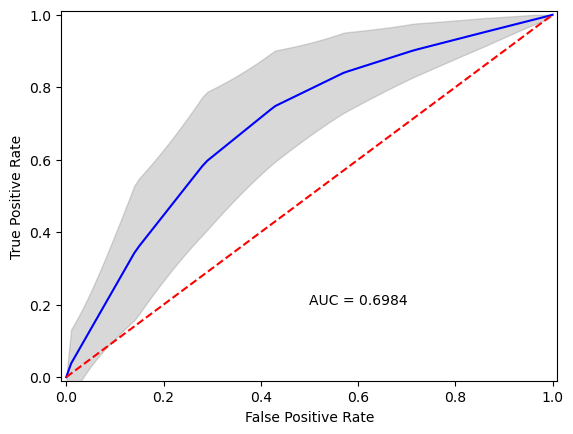


Decision Tree Classifier
2 67.48  ±11.70    66.90 ±20.51   68.06 ±18.38   67.48 ±11.70


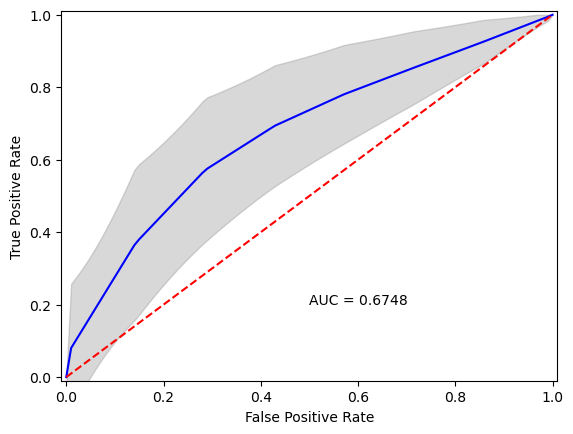


Linear Discriminant Analysis
3 58.63  ±11.90    50.23 ±19.74   67.03 ±17.50   58.63 ±11.90


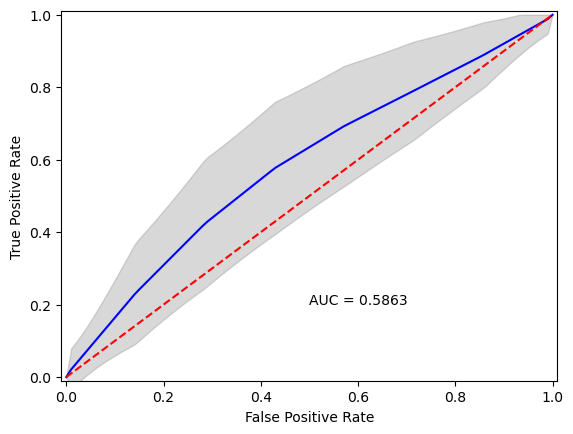


Gaussian Bayes
4 77.35  ±8.94    74.44 ±14.84   80.26 ±13.48   77.35 ±8.94


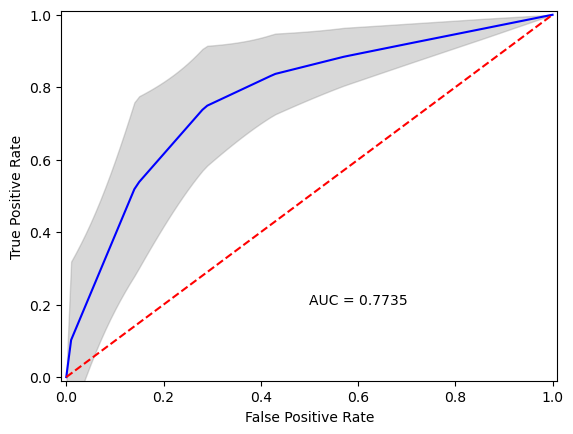


SVM
5 78.96  ±8.52    78.31 ±14.92   79.61 ±13.15   78.96 ±8.52


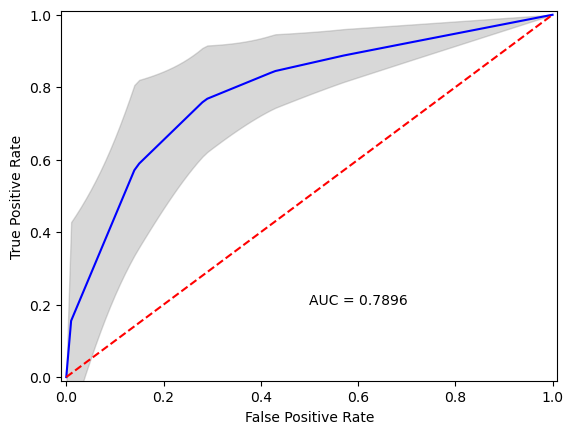


Random Choice
6 50.28  ±13.60    50.36 ±19.16   50.20 ±18.74   50.28 ±13.60


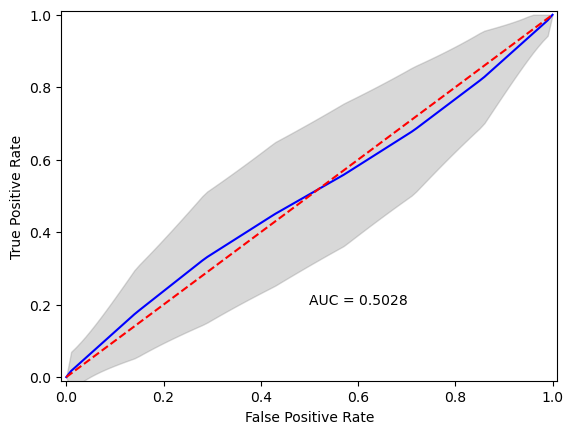


Deep Neural Network
7 74.09  ±9.86    67.36 ±18.82   80.83 ±13.45   74.09 ±9.86


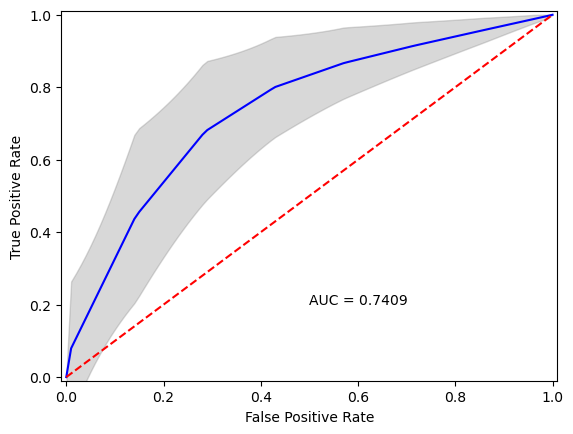


One class SVM
8 65.22  ±12.02    44.94 ±19.91   85.50 ±15.31   65.22 ±12.02


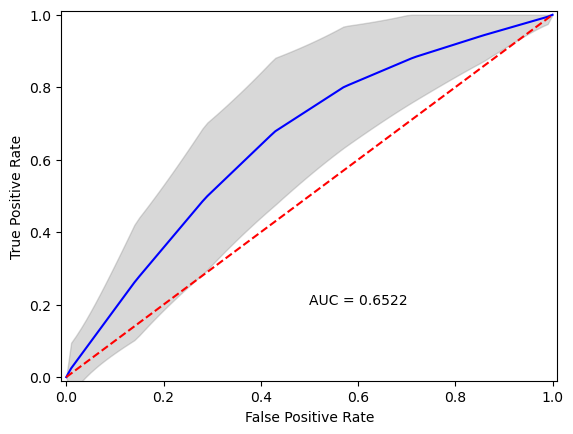


Autoencoder
9 80.41  ±3.89    81.75 ±6.66   76.59 ±17.01   79.17 ±6.79


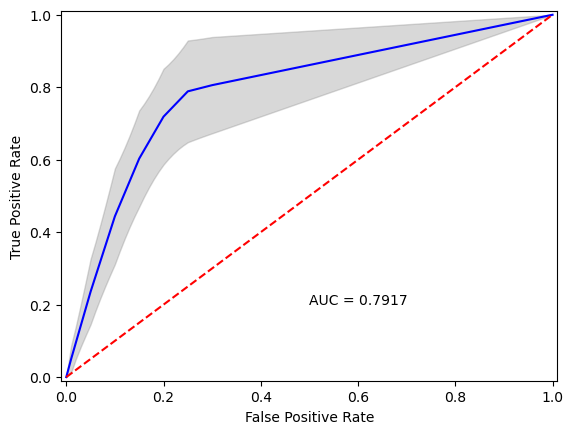


Random Forrest
10 74.10  ±10.49    70.04 ±17.69   78.16 ±15.85   74.10 ±10.49


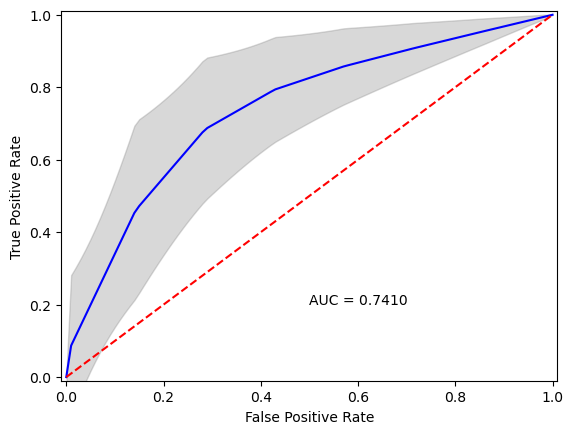

In [7]:
#--------------------------------------
#Deep Neural Network
#--------------------------------------

def DNN(X_train, X_test, y_train, y_test, scaler, class_ratio):
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    lb = LabelBinarizer().fit(y_train)
    y_train = lb.transform(y_train)
    (print(y_train))
    y_test = lb.transform(y_test)
    
    #balancing the classes
    class_Bad_DBS=float(np.sum(y_train==0))
    class_Good_DBS=float(np.sum(y_train==1))
    class_ratio=class_Good_DBS/class_Bad_DBS

    class_weights = {0:class_ratio, 1:1}

    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    #model.add(Dense(7, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # simple early stopping
    #https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
    #from keras.callbacks import EarlyStopping
    #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

    model.fit(X_train, y_train, epochs=50, class_weight=class_weights, batch_size=5, verbose=0)
    predictions = model.predict(X_test)
    print(predictions)
    predictions = lb.inverse_transform(predictions)
    print(predictions)
    print(y_test)
    y_test = lb.inverse_transform(y_test)
    print(y_test)
    return y_test, predictions


#--------------------------------------
#SVM
#--------------------------------------

def predSVM(classifier, X_train, X_test, y_train, y_test):
    pipe = make_pipeline(StandardScaler(), classifier)
    pipe.fit(X_train)
    y_pred = pipe.predict(X_test)
    y_pred[y_pred==1] = 2.0
    y_pred[y_pred==-1] = 1.0
    return y_test, y_pred, pipe


#--------------------------------------
#Autoencoder
#--------------------------------------

def Autoencoder(scaler, df):
    df1 = df[df['target'] == 1]
    df2 = df[df['target'] == 2]
    #bad DBS effect
    X1 = df1.iloc[:, 0:-1]
    y1 = df1.iloc[:, -1]
    #good and very good DBS effect
    X2 = df2.iloc[:, 0:-1]
    y2 = df2.iloc[:, -1]

    #good and very good DBS effect: splitting for trauining and testing
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33)
    #scaling
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
   
    #bad DBS
    X1 = scaler.transform(X1)

    #Autoencoder
    encoding_dim = 3 
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(encoding_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add((Dense(10, activation='relu')))
    model.add(Dropout(0.2))
    model.add((Dense(X_train.shape[1], activation='linear')))
    model.compile(loss='msle', optimizer='adam', metrics=['mse'])
    history = model.fit(X_train, X_train, epochs=100, batch_size=5,
                        validation_data=(X_train, X_train), verbose=0, shuffle=True)
    #Possible other methods for anomly detection max mae for example
    
    #good and very good DBS: prediction and errors
    #training
    X_train_pred = model.predict(X_train)
    errors = np.sum(np.square(X_train_pred - X_train)/X_train.shape[1], axis=1)
    threshold = np.mean(errors) + stdev(errors)
    #testing
    X_test_pred = model.predict(X_test)
    errors = np.sum(np.square(X_test_pred - X_test)/X_train.shape[1], axis=1)
    y_pred = [1.0 if err > threshold else 2.0 for err in errors]
    
    #bad DBS: prediction of outliers
    X1_pred = model.predict(X1)
    errors = np.sum(np.square(X1_pred - X1)/X_train.shape[1], axis=1)
    y1_pred = [1.0 if err > threshold else 2.0 for err in errors] #bloga klase = 1, gera ir labai gera = 2
    
    #all predictions
    t_vals = np.concatenate([y_test.values, y1.values])
    p_vals = np.concatenate([y_pred, y1_pred])

    return t_vals, p_vals

#----------------------------------------------------------------------------------------
#Classification Methods
#----------------------------------------------------------------------------------------


def REP(X, y, N = 10, scaler = scaler, df=df):

    res_acc = [[], [], [], [], [], [], [], [], [], []]
    res_sens = [[], [], [], [], [], [], [], [], [], []]
    res_spec = [[], [], [], [], [], [], [], [], [], []]
    res_AUC = [[], [], [], [], [], [], [], [], [], []]
    tprs = [[], [], [], [], [], [], [], [], [], []]
    
    for i in range(N):
        print("Run %d" %(i))

        #split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, stratify=y)
        print("y_test")
        print(y_test)

        #scaling  
        scaler = StandardScaler()
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        #balancing the classes        
        class_Bad_DBS=float(np.sum(y_train==1))
        class_Good_DBS=float(np.sum(y_train==2))
        class_ratio=class_Good_DBS/class_Bad_DBS

        #Classes: 1 - bad DBS, 2 - good and very good DBS  
        class_weights = {1:class_ratio, 2:1}
        print(class_weights)


        #----------------------------------------------
        #Classification Methods
        #----------------------------------------------
        #LogReg
        logreg = LogisticRegression(class_weight=class_weights)
        print(y_train)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        print("logreg y_pred")
        print(y_pred)
        
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[0].append(acc)
        res_sens[0].append(sens)
        res_spec[0].append(spec)
        res_AUC[0].append(AUC)
        tprs[0].append(tpr)

        #DecTree
        y_test, y_pred, model = predictionR(DecisionTreeClassifier(class_weight=class_weights), X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[1].append(acc)
        res_sens[1].append(sens)
        res_spec[1].append(spec)
        res_AUC[1].append(AUC)
        tprs[1].append(tpr)
        
        #Random forrest
        y_test, y_pred, model = predictionR(RandomForestClassifier(), X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[9].append(acc)
        res_sens[9].append(sens)
        res_spec[9].append(spec)
        res_AUC[9].append(AUC)
        tprs[9].append(tpr)

        #Linear Discriminant 
        y_test, y_pred, model = predictionR(LinearDiscriminantAnalysis(), X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[2].append(acc)
        res_sens[2].append(sens)
        res_spec[2].append(spec)
        res_AUC[2].append(AUC)
        tprs[2].append(tpr)

        #Naive Bayes
        y_test, y_pred, model = predictionR(GaussianNB(), X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[3].append(acc)
        res_sens[3].append(sens)
        res_spec[3].append(spec)
        res_AUC[3].append(AUC)
        tprs[3].append(tpr)
        
        #SVM
        y_test, y_pred, model = predictionR(SVC(class_weight=class_weights), X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[4].append(acc)
        res_sens[4].append(sens)
        res_spec[4].append(spec)
        res_AUC[4].append(AUC)
        tprs[4].append(tpr)

        ##RandomC##
        y_pred = []
        for el in y_test:
            y_pred.append(choice([1.0, 2.0]))
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[5].append(acc)
        res_sens[5].append(sens)
        res_spec[5].append(spec)
        res_AUC[5].append(AUC)
        tprs[5].append(tpr)

        #DNN
        y_test, y_pred = DNN(X_train, X_test, y_train, y_test, scaler, class_ratio)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[6].append(acc)
        res_sens[6].append(sens)
        res_spec[6].append(spec)
        res_AUC[6].append(AUC)
        tprs[6].append(tpr)
        
        ##Anomaly detection##

        #One class SVM
        #y_test, y_pred, model = predSVM(OneClassSVM(nu=4/29, gamma=0.005), #split 0.1, 4 bad + 25 good
        #                                X_train, X_test, y_train, y_test)
        y_test, y_pred, model = predSVM(OneClassSVM(nu=7/34, gamma=0.005), #split 0.1, 7 bad + 27 good
                                        X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[7].append(acc)
        res_sens[7].append(sens)
        res_spec[7].append(spec)
        res_AUC[7].append(AUC)
        tprs[7].append(tpr)
     
        #Autoencoder
        y_test, y_pred = Autoencoder(scaler, df)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[8].append(acc)
        res_sens[8].append(sens)
        res_spec[8].append(spec)
        res_AUC[8].append(AUC)
        tprs[8].append(tpr)
        
        
    print("Accuracy %  Sensitivity % Specificity % AUC")

    #LogReg
    print("\nLogistic Regression")
    PRES(1,res_acc[0], res_sens[0], res_spec[0], res_AUC[0], tprs[0])
    #DecTree
    print("\nDecision Tree Classifier")
    PRES(2, res_acc[1], res_sens[1], res_spec[1], res_AUC[1], tprs[1])
    #Linear Discriminat 
    print("\nLinear Discriminant Analysis")
    PRES(3, res_acc[2], res_sens[2], res_spec[2], res_AUC[2], tprs[2])
    #Naive Bayes
    print("\nGaussian Bayes")
    PRES(4, res_acc[3], res_sens[3], res_spec[3], res_AUC[3], tprs[3])
    #SVM
    print("\nSVM")
    PRES(5, res_acc[4], res_sens[4], res_spec[4], res_AUC[4], tprs[4])
    ##RC##
    print("\nRandom Choice")
    PRES(6, res_acc[5], res_sens[5], res_spec[5], res_AUC[5], tprs[5])
    #NN
    print("\nDeep Neural Network")
    PRES(7, res_acc[6], res_sens[6], res_spec[6], res_AUC[6], tprs[6])
    ##Anomaly##
    #One Class SVM
    print("\nOne class SVM")
    PRES(8, res_acc[7], res_sens[7], res_spec[7], res_AUC[7], tprs[7])
    #Autoencoder
    print("\nAutoencoder")
    PRES(9, res_acc[8], res_sens[8], res_spec[8], res_AUC[8], tprs[8])
    print("\nRandom Forrest")
    PRES(10, res_acc[9], res_sens[9], res_spec[9], res_AUC[9], tprs[9])

    np.save('ACC.npy', res_acc)
    np.save('SENS.npy', res_sens)
    np.save('SPEC.npy', res_spec)
    np.save('AUC.npy', res_AUC)
    np.save('TPRS.npy', tprs)    
    
#N_runs=10
N_runs=1000

REP(X, y, N_runs)